Name: Train&Validation.ipynb\
Description: Train and validation proposed NEtwork\
Author: Behzad Valipour Sh. <behzad.valipour@outlook.com>\
Date: 04.09.2022\


lines (17 sloc)  1.05 KB\

MIT License\

Copyright (c) 2022 Behzad Valipour Sh.\

Permission is hereby granted, free of charge, to any person obtaining a copy\
of this software and associated documentation files (the "Software"), to deal\
in the Software without restriction, including without limitation the rights\
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell\
copies of the Software, and to permit persons to whom the Software is\
furnished to do so, subject to the following conditions:\

The above copyright notice and this permission notice shall be included in all\
copies or substantial portions of the Software.\

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,\
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE\
SOFTWARE.\


In [20]:
from src import LoadImageData, NDVIModelNet, NDVIModelUNet

import torch
from torch import nn, optim
import torchmetrics

import pytorch_lightning as pl
from torch.utils.data import DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

import albumentations as A
from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from random import sample
import numpy as np
import os,sys

In [4]:
transform = A.Compose([ToTensorV2()])

In [5]:
# Constants
n_epochs = 100
batch_size = 32

# Load Data

In [21]:
train_data = LoadImageData('../data/labels/train/',transform=transform)
valid_data = LoadImageData('../data/labels/val/',transform=transform)
test_data = LoadImageData('../data/labels/test/',transform=transform)

In [22]:
train_loader = DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True,num_workers=20,pin_memory=True)
validation_loader = DataLoader(dataset=valid_data,batch_size=batch_size,shuffle=False,num_workers=20,pin_memory=True)
test_loader = DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False,num_workers=20,pin_memory=True)

# Train

In [23]:
class NDVIModel(pl.LightningModule):
    def __init__(self,learning_rate = 0.001):
        super(NDVIModel,self).__init__()
        
        
        self.model = NDVIModelUNet()
        self.learning_rate = learning_rate
        self.loss = nn.MSELoss()
        self.save_hyperparameters()
        
    def forward(self,InPut):
        return self.model(InPut)
    
    def training_step(self, batch, batch_idx):
        X,y = batch
        
        pred = self(X)
        loss = self.loss(pred,y)
        self.log('Train_Loss', loss, on_epoch=True, on_step=True,prog_bar=True)
        return loss
        
    def validation_step(self, batch, batch_idx):
        X,y = batch
        
        pred = self(X)
        loss = self.loss(pred,y)
        self.log('validation_Loss', loss, on_epoch=True, on_step=True, prog_bar=True)
        return loss
        
        
    def test_step(self, batch, batch_idx):
        X,y = batch
        pred = self(X)
        loss = self.loss(pred,y)
        self.log('Test_Loss', loss, on_epoch=True, on_step=True)
        return loss
        
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adagrad(self.parameters(),lr=self.learning_rate)
        return optimizer

In [25]:
model = NDVIModel()
ckpt_dir = "/scicore/home/roeoesli/valipo0000/training/NDVI-model/model"
early_stop_callback = EarlyStopping(monitor="validation_Loss_epoch", patience=10,min_delta=0.001, verbose=True, mode="min")
ckpt_callback = pl.callbacks.ModelCheckpoint(filename="NDVIModel-0.0.1_{epoch:02d}-{validation_Loss_epoch:.6f}",monitor='validation_Loss_epoch',mode='min',save_top_k=3,verbose=True)
trainer = pl.Trainer(default_root_dir=ckpt_dir, gpus=1,
                        callbacks=[ckpt_callback,early_stop_callback],
                        log_every_n_steps=3,
                        max_epochs=n_epochs,
                        fast_dev_run=False)
trainer.fit(model, train_dataloaders=train_loader,val_dataloaders=validation_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | NDVIModelUNet | 66.5 K
1 | loss  | MSELoss       | 0     
----------------------------------------
66.5 K    Trainable params
0         Non-trainable params
66.5 K    Total params
0.266     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved. New best score: 0.040
Epoch 0, global step 562: 'validation_Loss_epoch' reached 0.04036 (best 0.04036), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=00-validation_Loss_epoch=0.040363.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved by 0.002 >= min_delta = 0.001. New best score: 0.039
Epoch 1, global step 1124: 'validation_Loss_epoch' reached 0.03886 (best 0.03886), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=01-validation_Loss_epoch=0.038859.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 1686: 'validation_Loss_epoch' reached 0.03810 (best 0.03810), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=02-validation_Loss_epoch=0.038101.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved by 0.001 >= min_delta = 0.001. New best score: 0.038
Epoch 3, global step 2248: 'validation_Loss_epoch' reached 0.03767 (best 0.03767), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=03-validation_Loss_epoch=0.037673.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 2810: 'validation_Loss_epoch' reached 0.03764 (best 0.03764), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=04-validation_Loss_epoch=0.037641.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 3372: 'validation_Loss_epoch' reached 0.03714 (best 0.03714), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=05-validation_Loss_epoch=0.037143.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 3934: 'validation_Loss_epoch' reached 0.03693 (best 0.03693), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=06-validation_Loss_epoch=0.036928.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 4496: 'validation_Loss_epoch' reached 0.03689 (best 0.03689), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=07-validation_Loss_epoch=0.036887.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 5058: 'validation_Loss_epoch' reached 0.03686 (best 0.03686), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=08-validation_Loss_epoch=0.036858.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 5620: 'validation_Loss_epoch' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 10, global step 6182: 'validation_Loss_epoch' reached 0.03667 (best 0.03667), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=10-validation_Loss_epoch=0.036675.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 11, global step 6744: 'validation_Loss_epoch' was not in top 3


Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved by 0.001 >= min_delta = 0.001. New best score: 0.036
Epoch 12, global step 7306: 'validation_Loss_epoch' reached 0.03645 (best 0.03645), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=12-validation_Loss_epoch=0.036448.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 13, global step 7868: 'validation_Loss_epoch' reached 0.03648 (best 0.03645), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=13-validation_Loss_epoch=0.036484.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 14, global step 8430: 'validation_Loss_epoch' reached 0.03643 (best 0.03643), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=14-validation_Loss_epoch=0.036434.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 15, global step 8992: 'validation_Loss_epoch' reached 0.03644 (best 0.03643), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=15-validation_Loss_epoch=0.036438.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 16, global step 9554: 'validation_Loss_epoch' reached 0.03631 (best 0.03631), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=16-validation_Loss_epoch=0.036310.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 17, global step 10116: 'validation_Loss_epoch' reached 0.03631 (best 0.03631), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=17-validation_Loss_epoch=0.036309.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 18, global step 10678: 'validation_Loss_epoch' reached 0.03631 (best 0.03631), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=18-validation_Loss_epoch=0.036307.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 19, global step 11240: 'validation_Loss_epoch' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 20, global step 11802: 'validation_Loss_epoch' reached 0.03627 (best 0.03627), saving model to '/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=20-validation_Loss_epoch=0.036267.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 21, global step 12364: 'validation_Loss_epoch' was not in top 3


Validation: 0it [00:00, ?it/s]

Monitored metric validation_Loss_epoch did not improve in the last 10 records. Best score: 0.036. Signaling Trainer to stop.
Epoch 22, global step 12926: 'validation_Loss_epoch' was not in top 3


# Validation

In [26]:
trainer.test(ckpt_path='best',dataloaders=test_loader)

Restoring states from the checkpoint path at /scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=20-validation_Loss_epoch=0.036267.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=20-validation_Loss_epoch=0.036267.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Test_Loss_epoch        0.03486771509051323
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'Test_Loss_epoch': 0.03486771509051323}]

In [34]:
model_ = NDVIModel()
train_model = model_.load_from_checkpoint(checkpoint_path='/scicore/home/roeoesli/valipo0000/training/NDVI-model/model/lightning_logs/version_55267280/checkpoints/NDVIModel-0.0.1_epoch=20-validation_Loss_epoch=0.036267.ckpt')

In [42]:
pred_NDVI.shape

(1, 1, 112, 112)

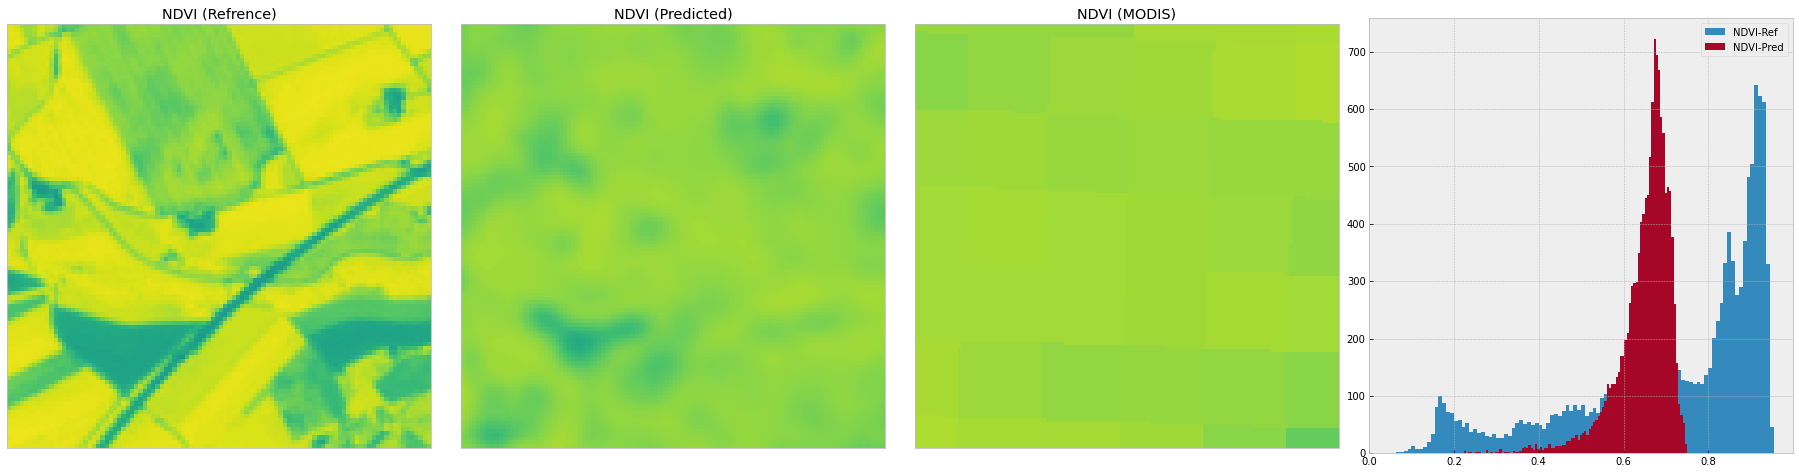

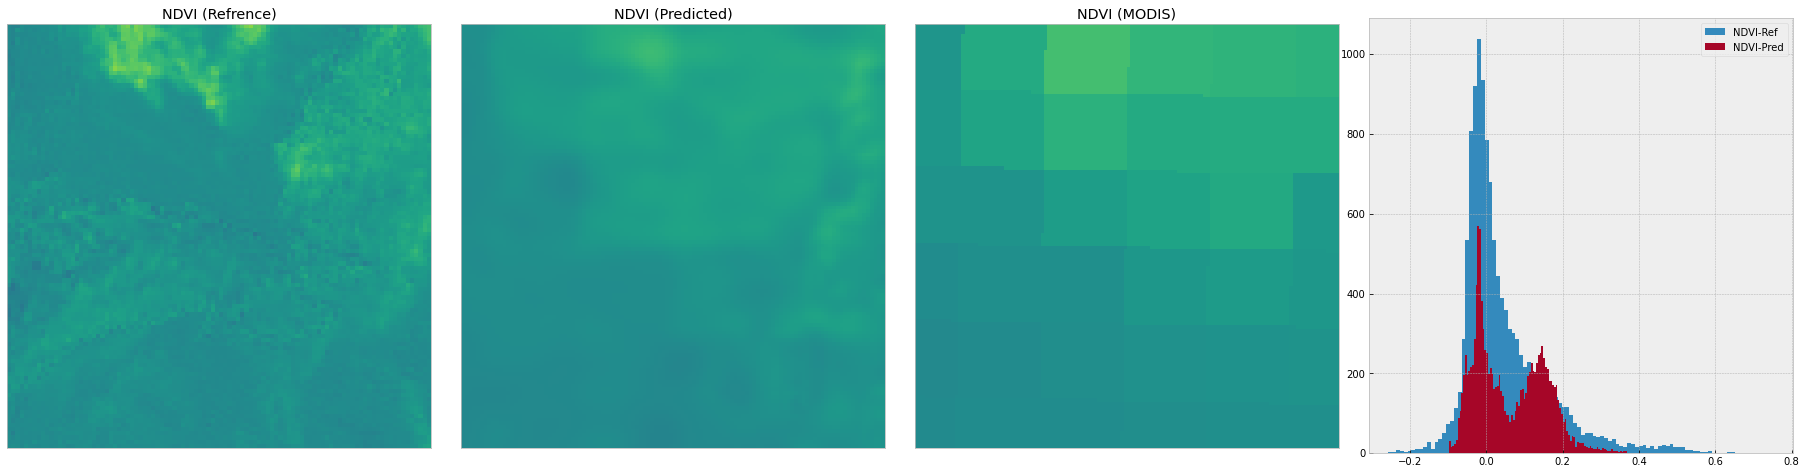

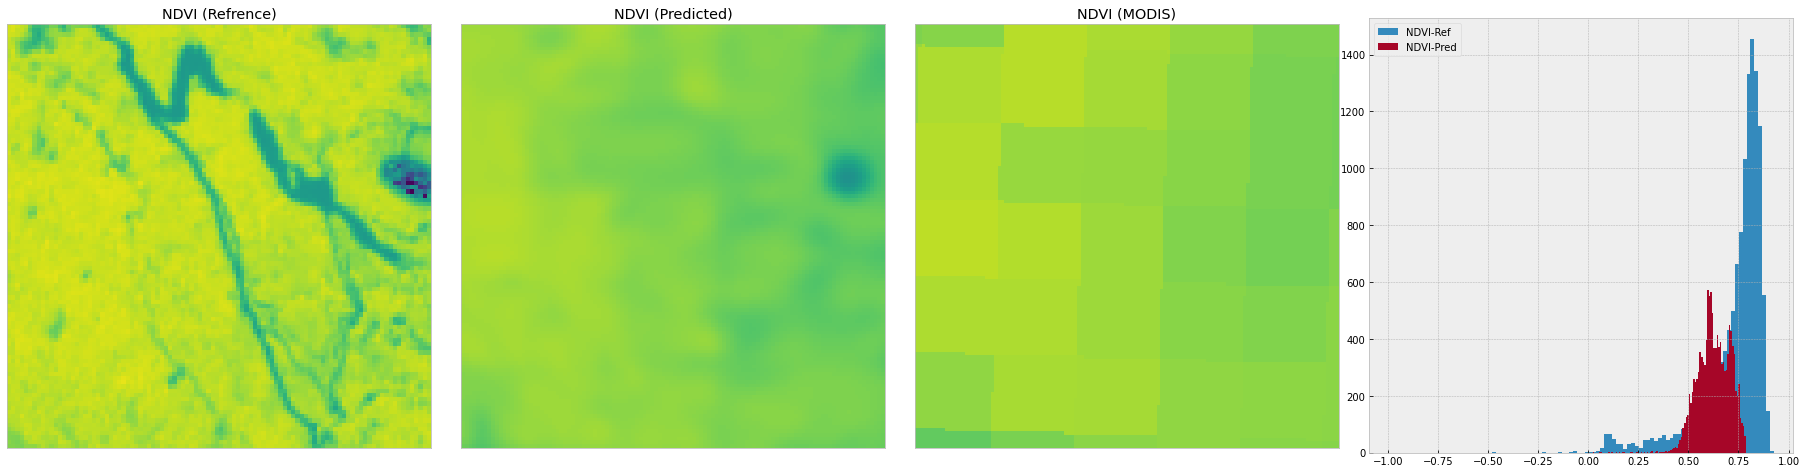

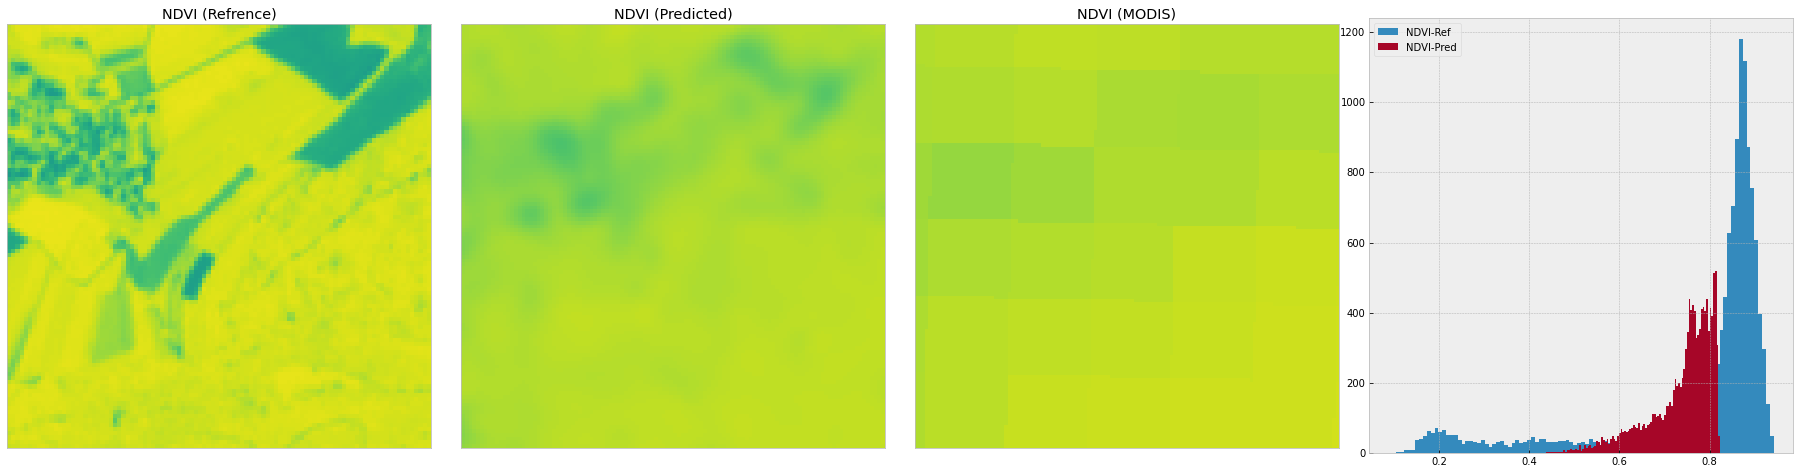

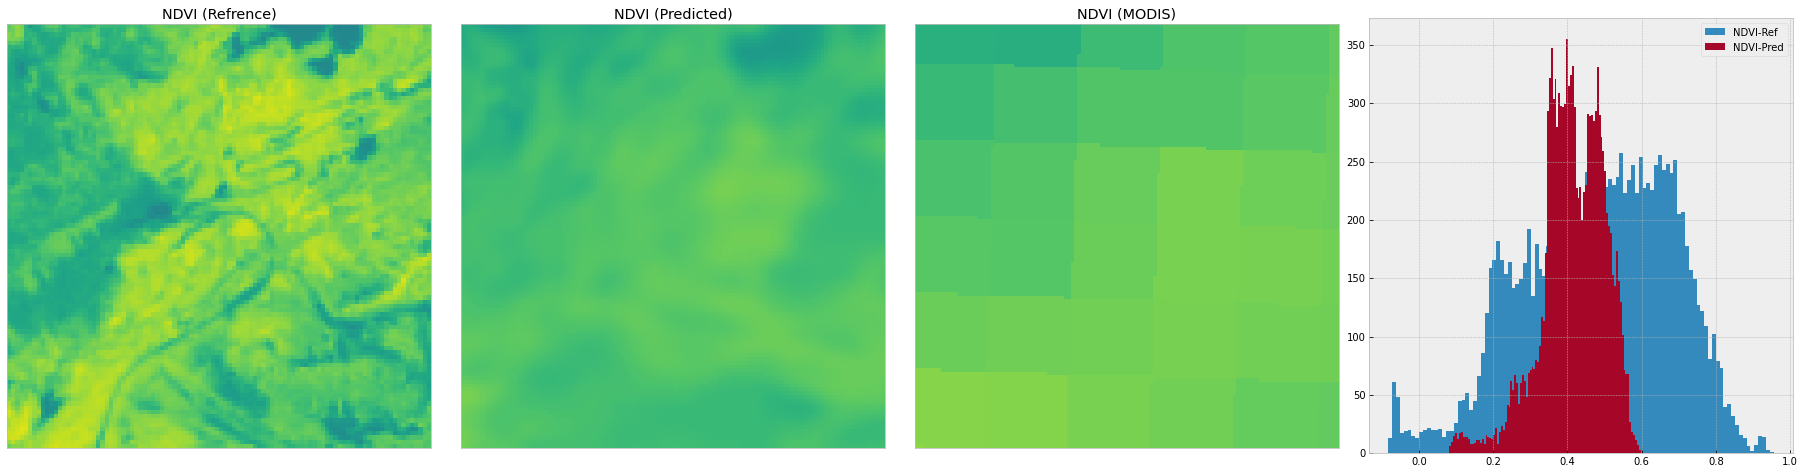

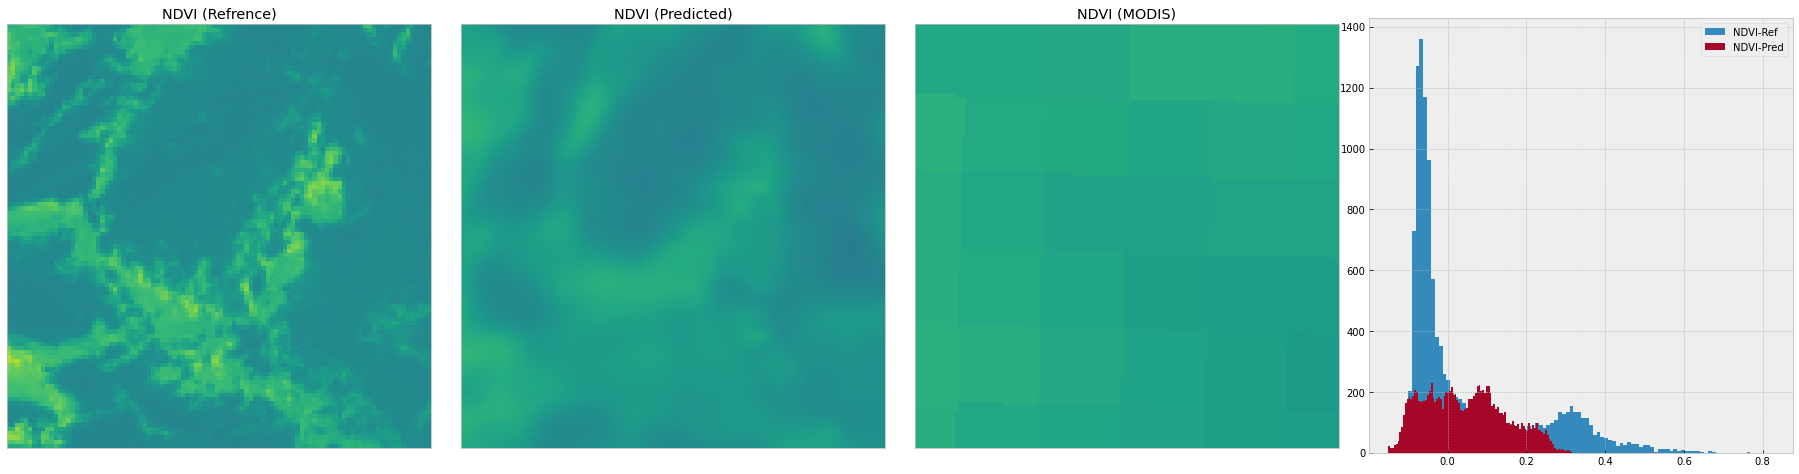

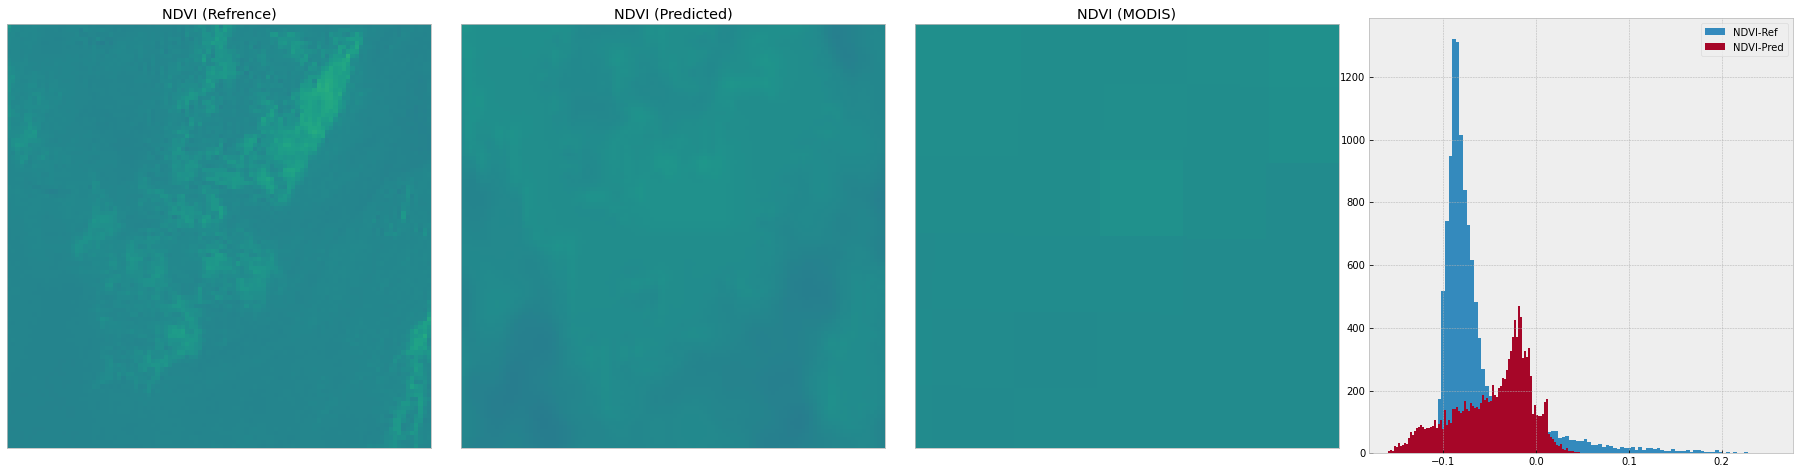

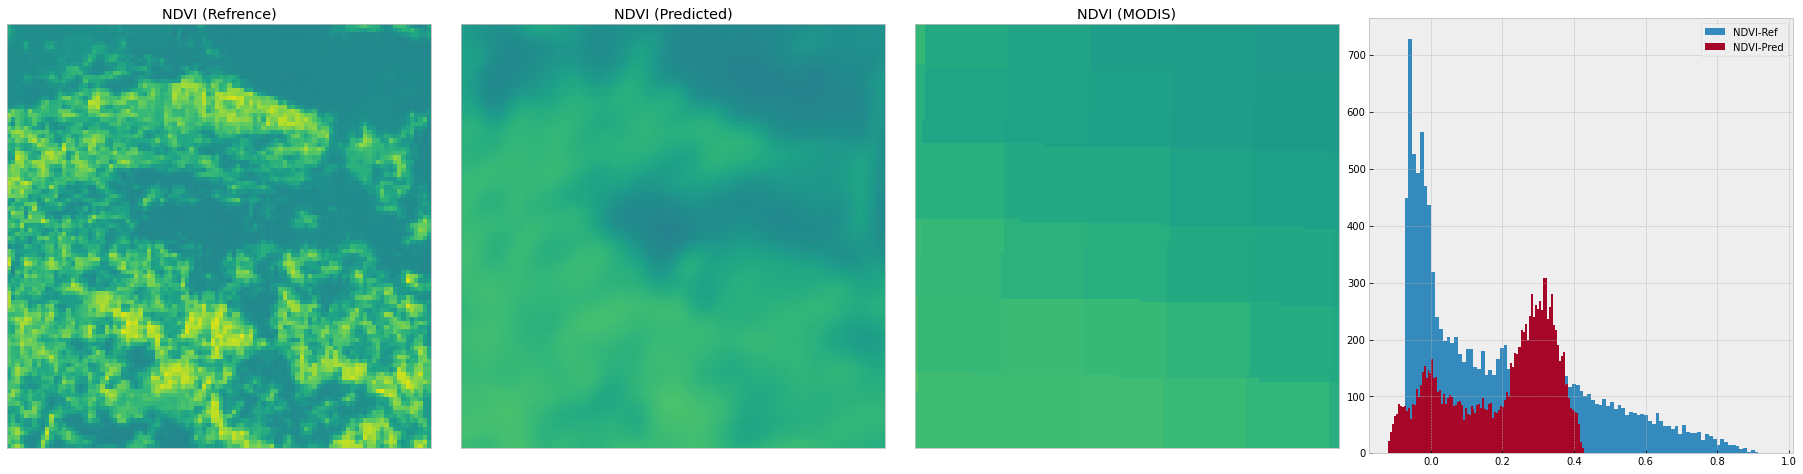

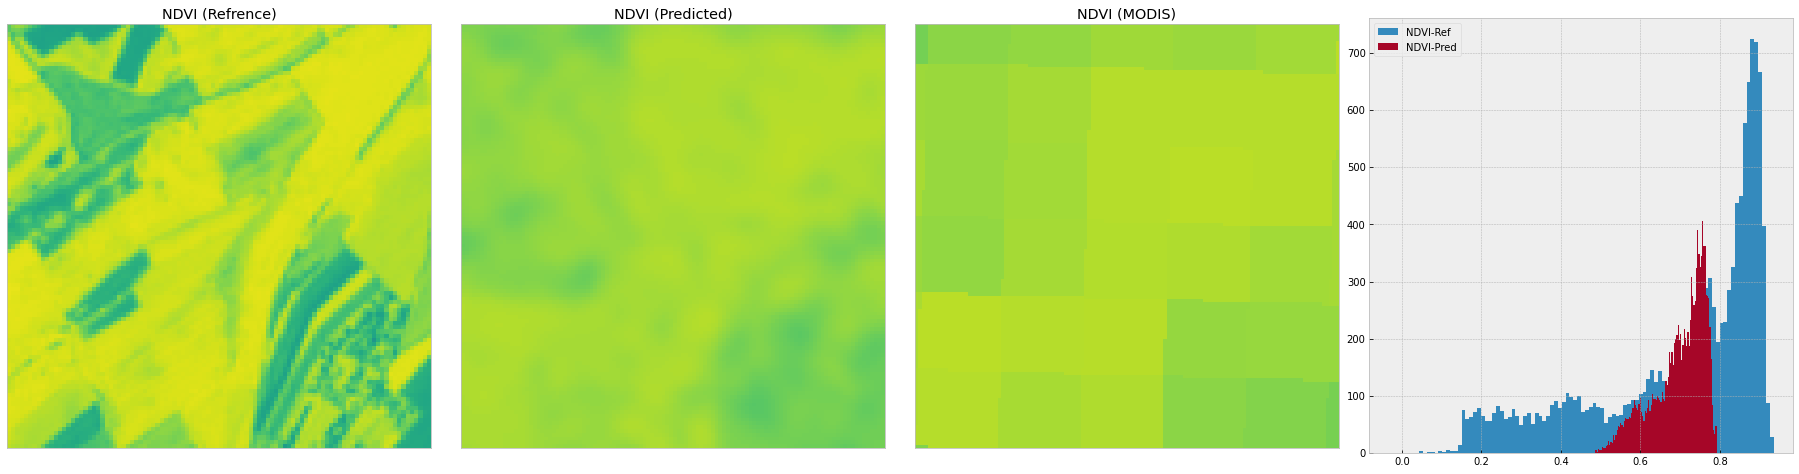

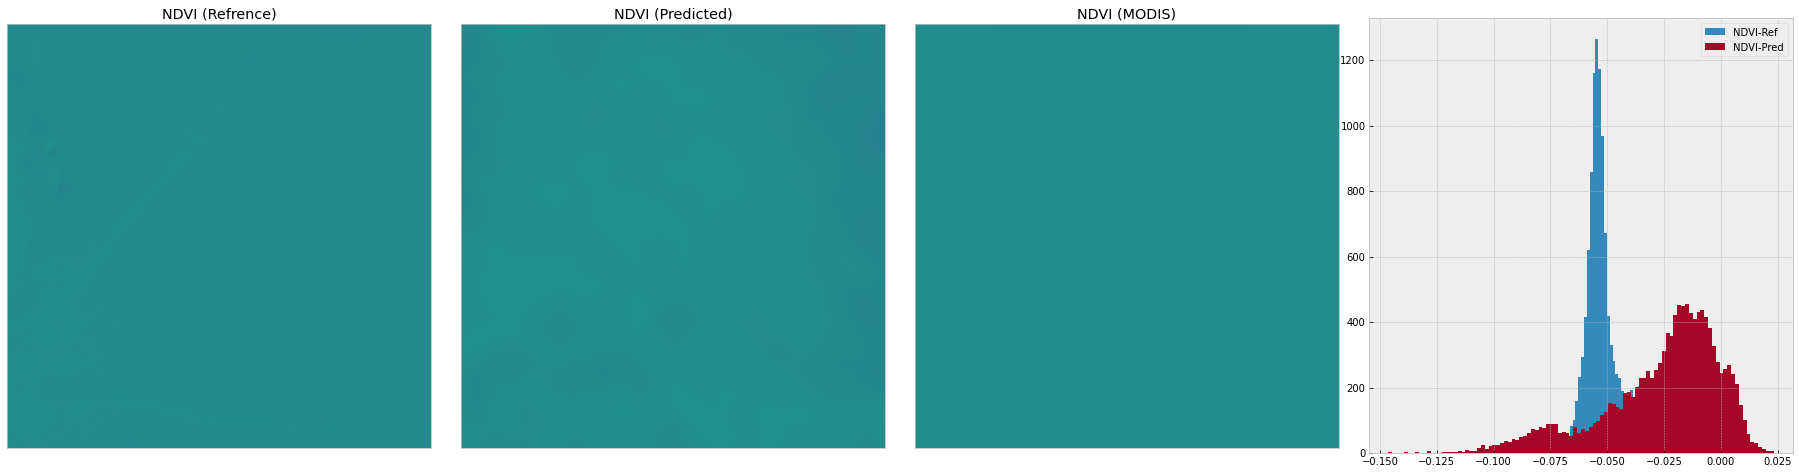

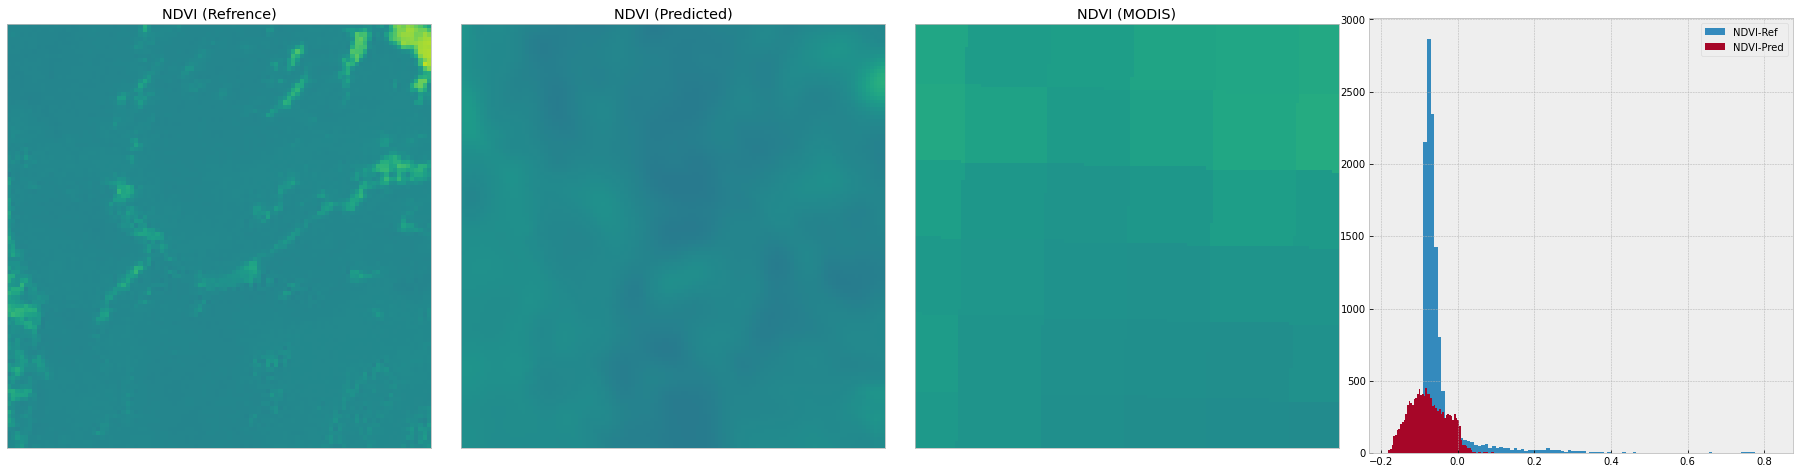

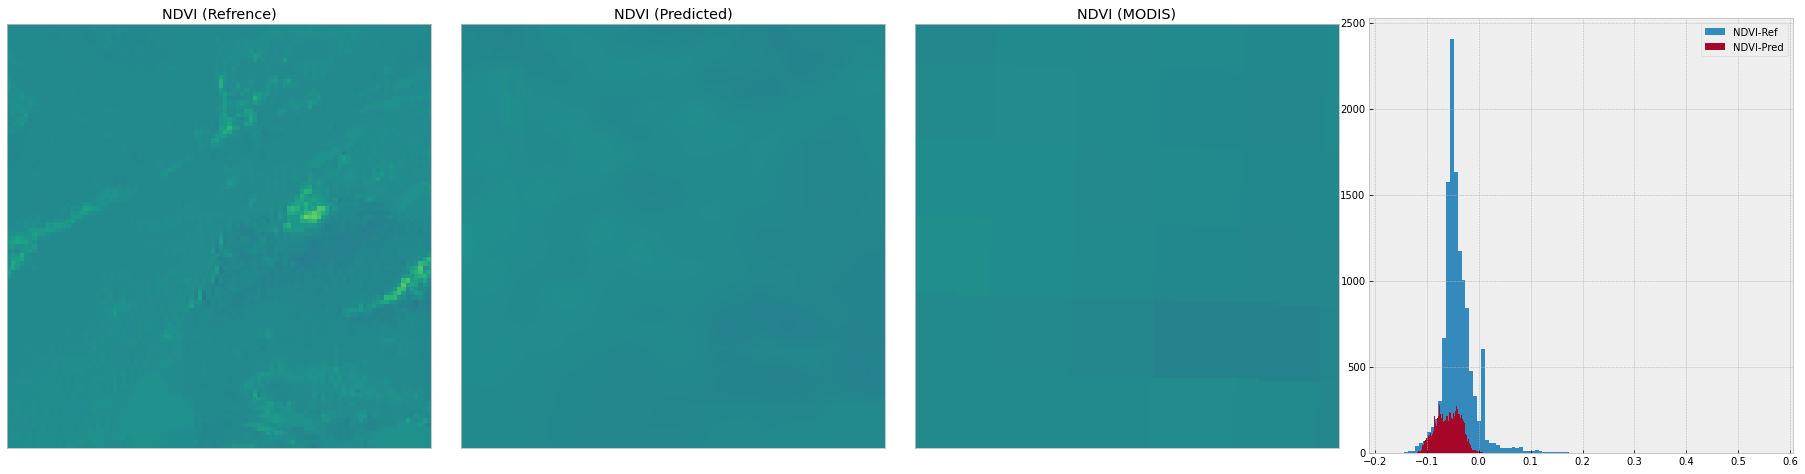

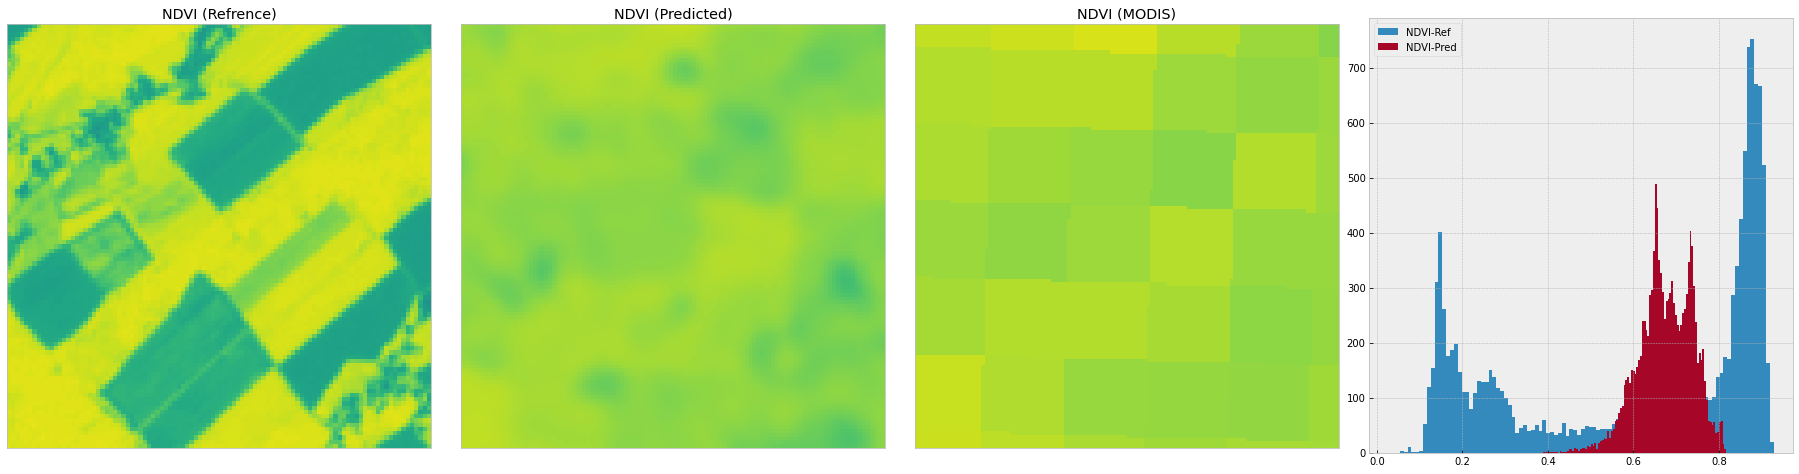

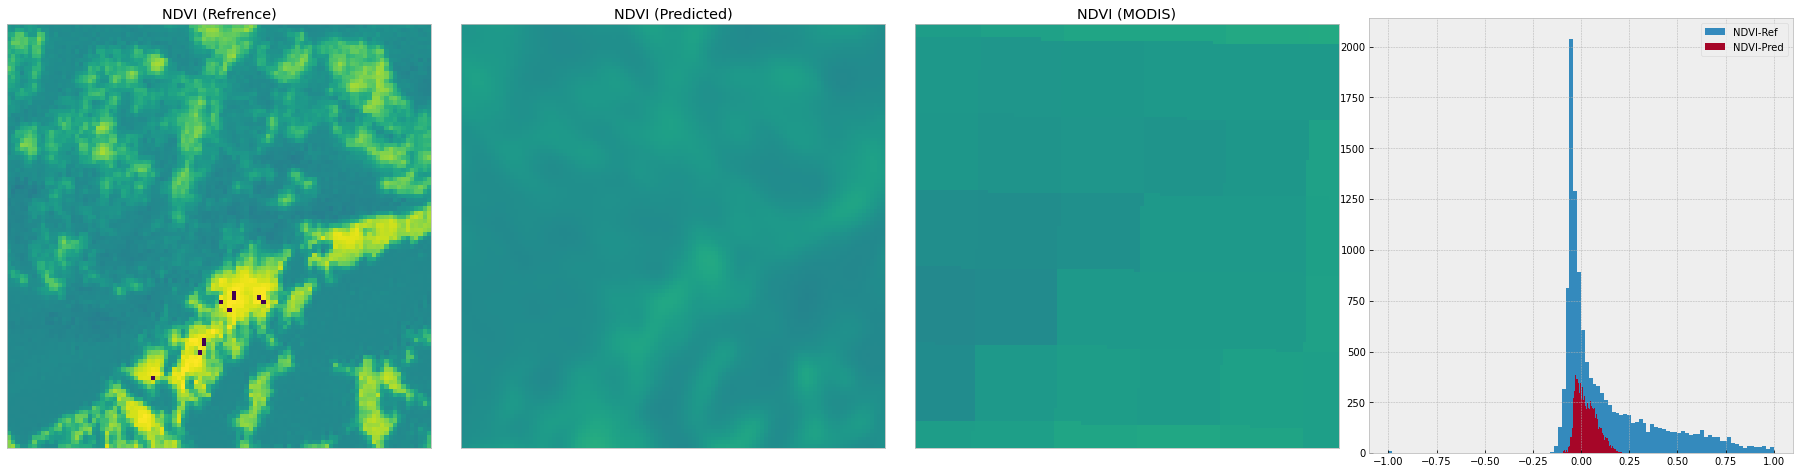

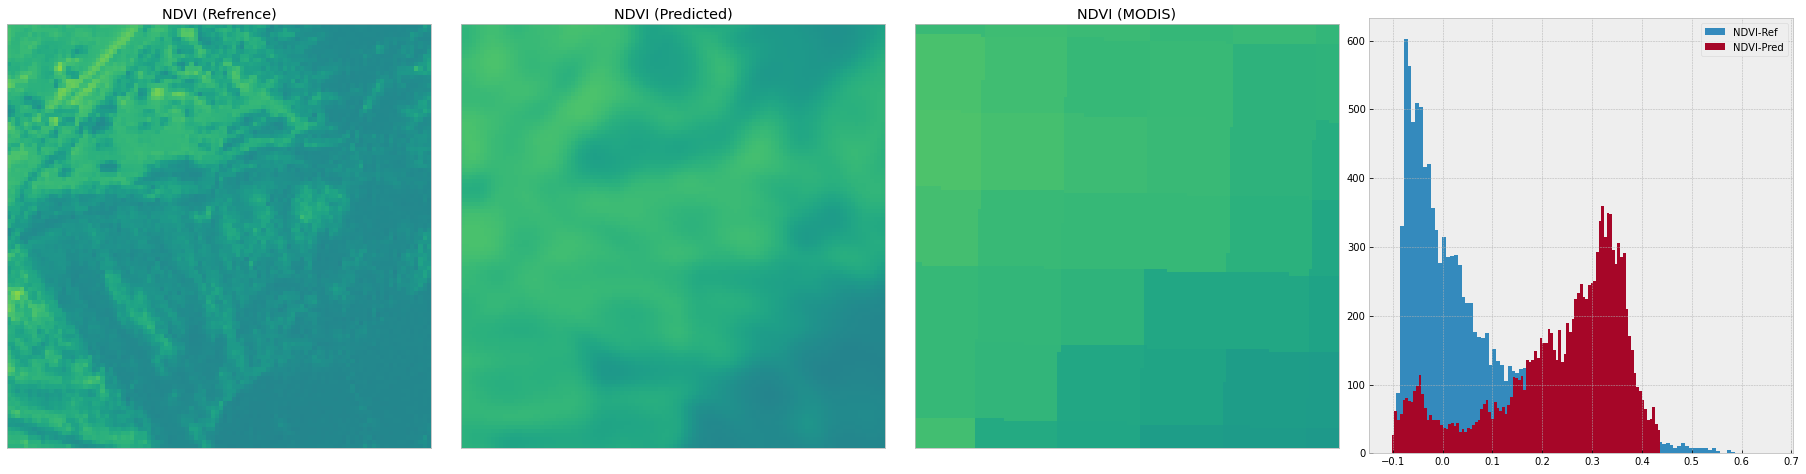

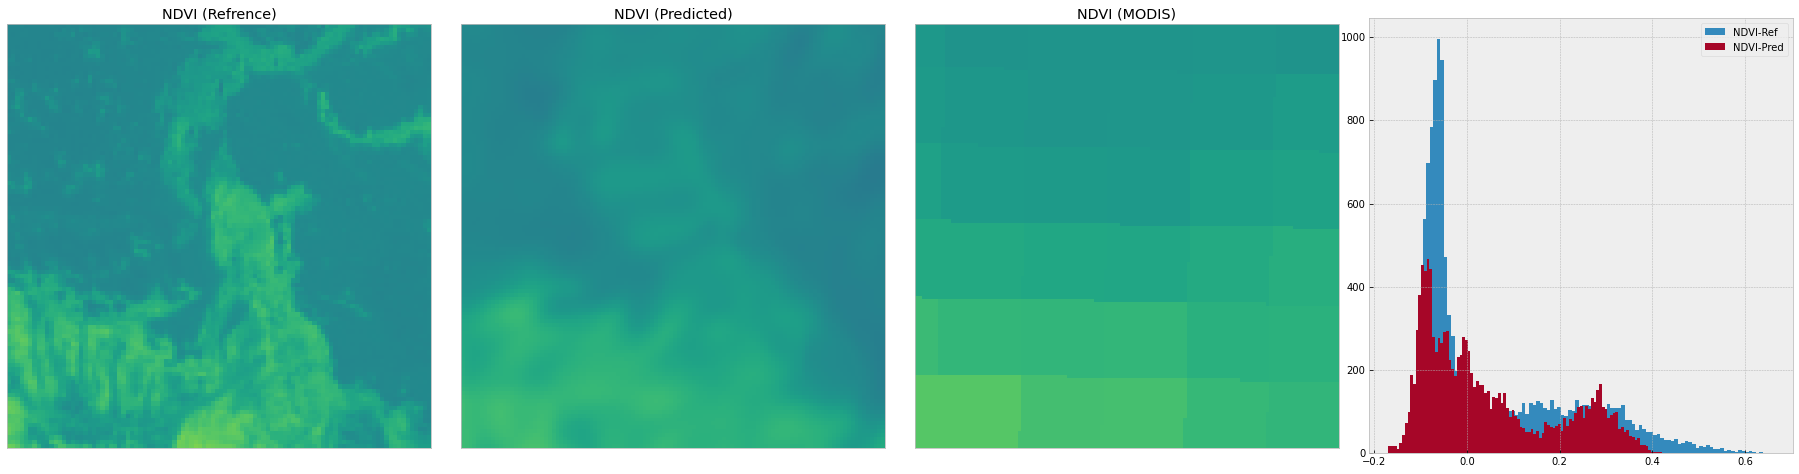

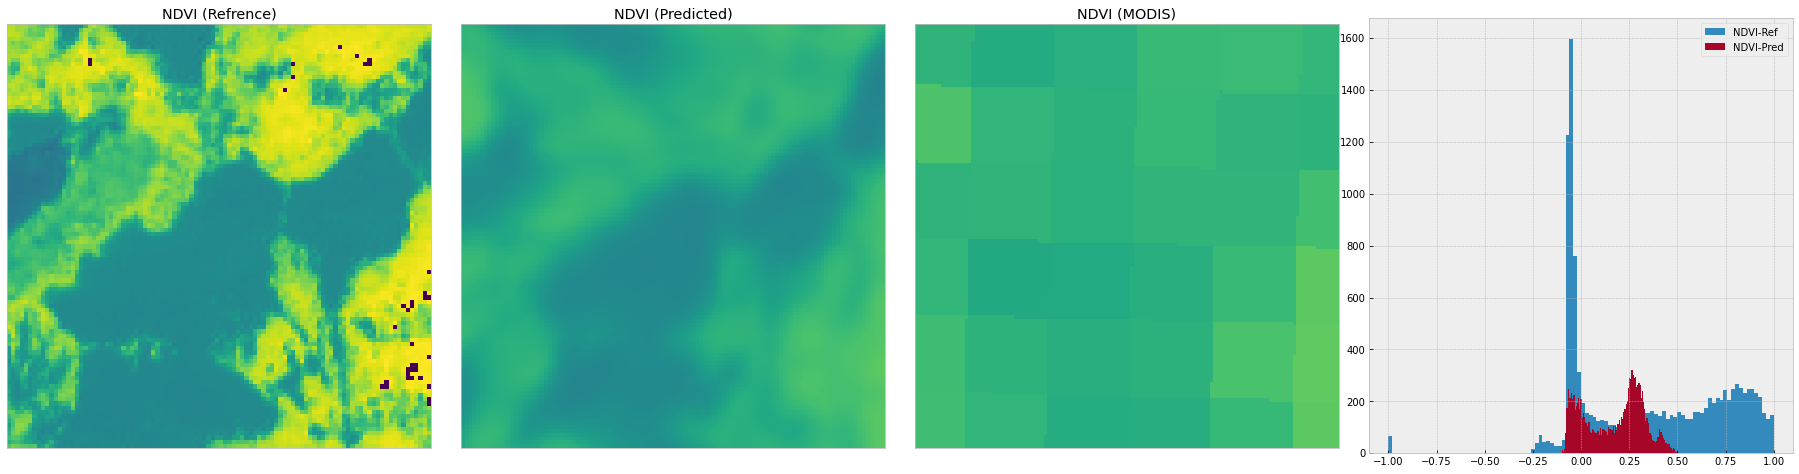

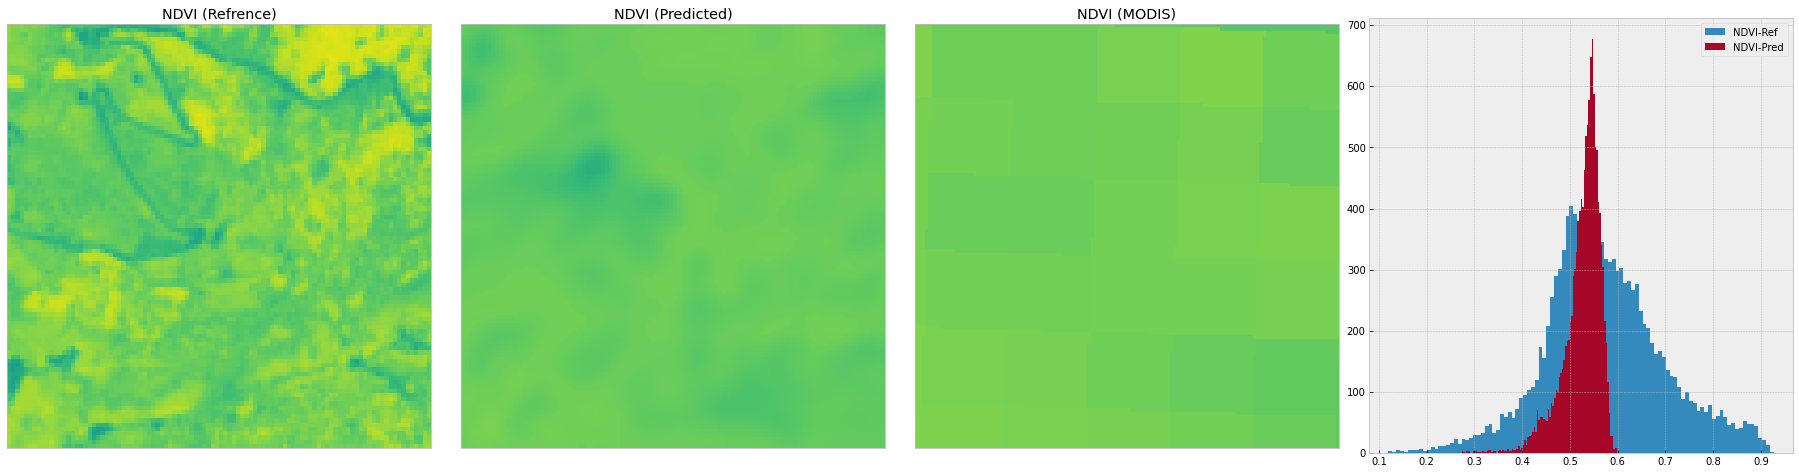

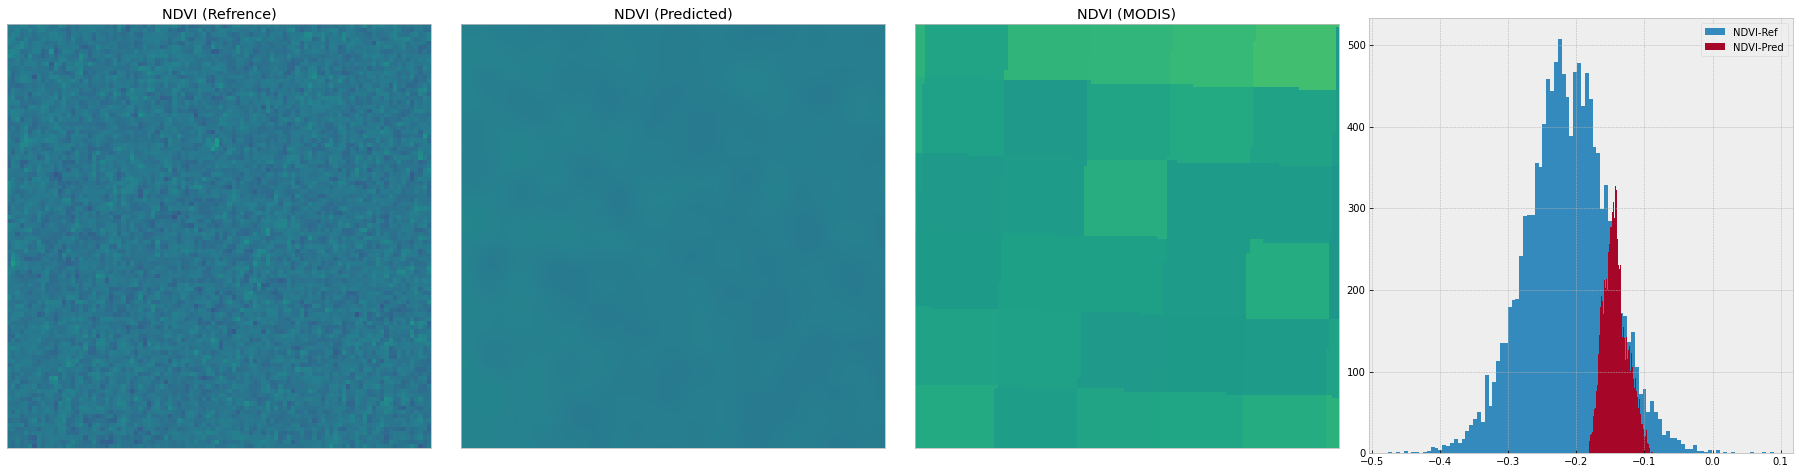

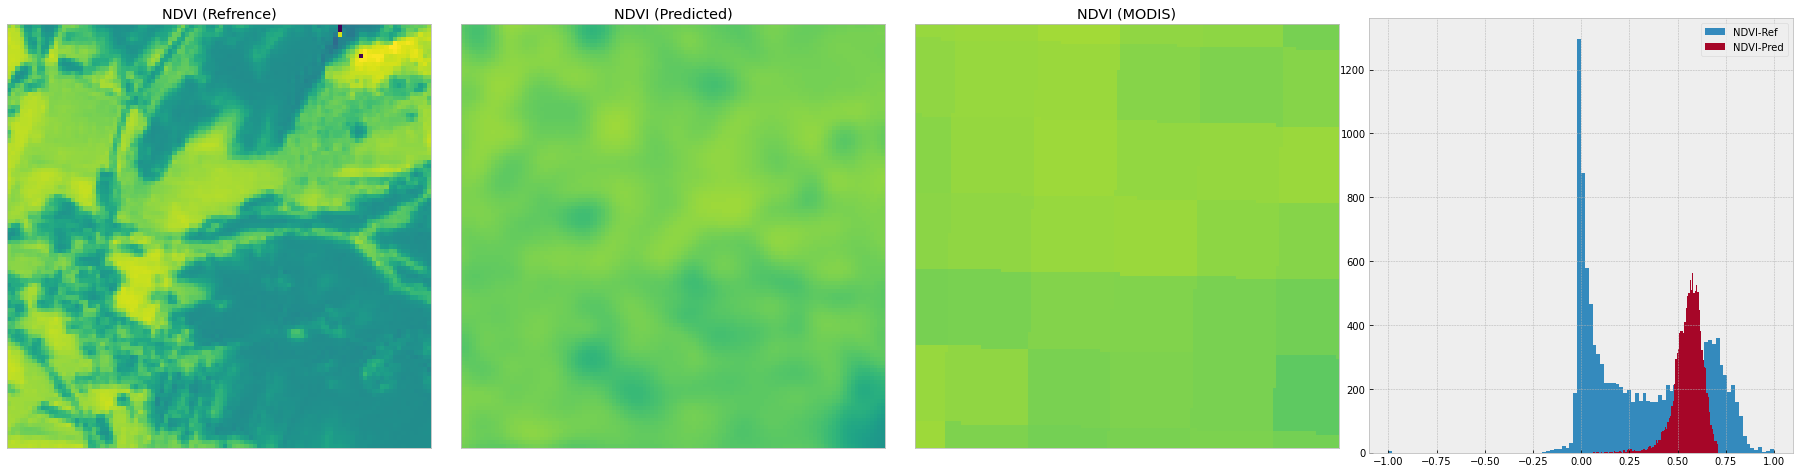

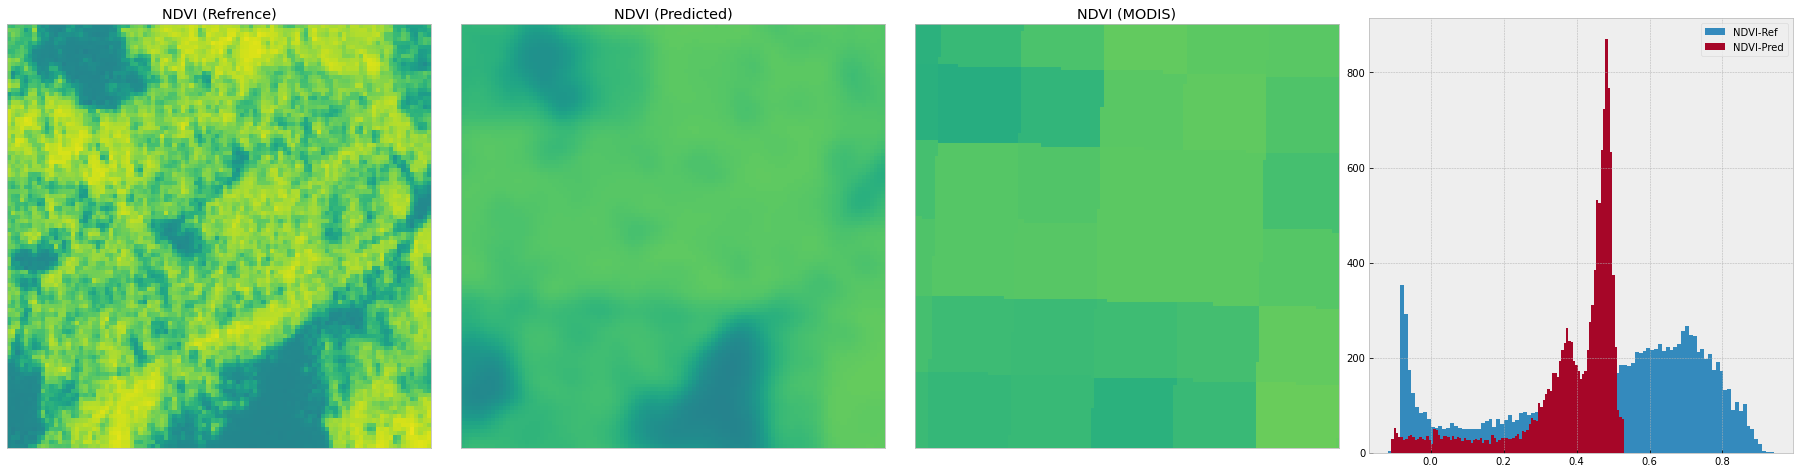

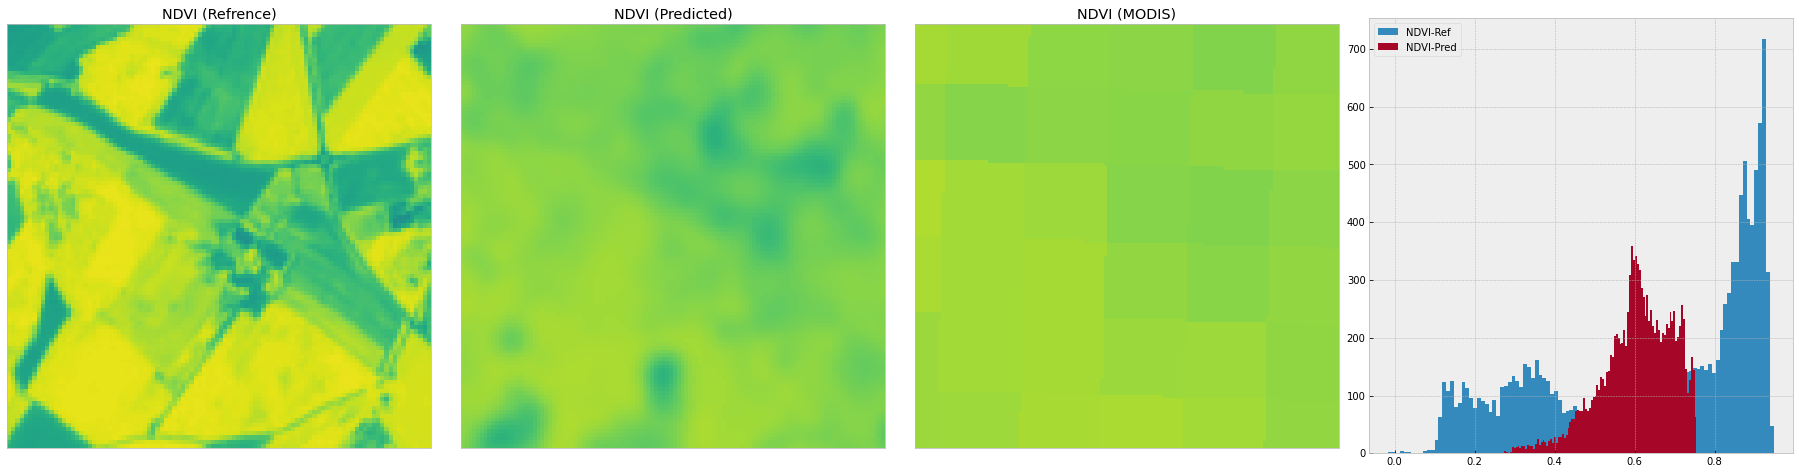

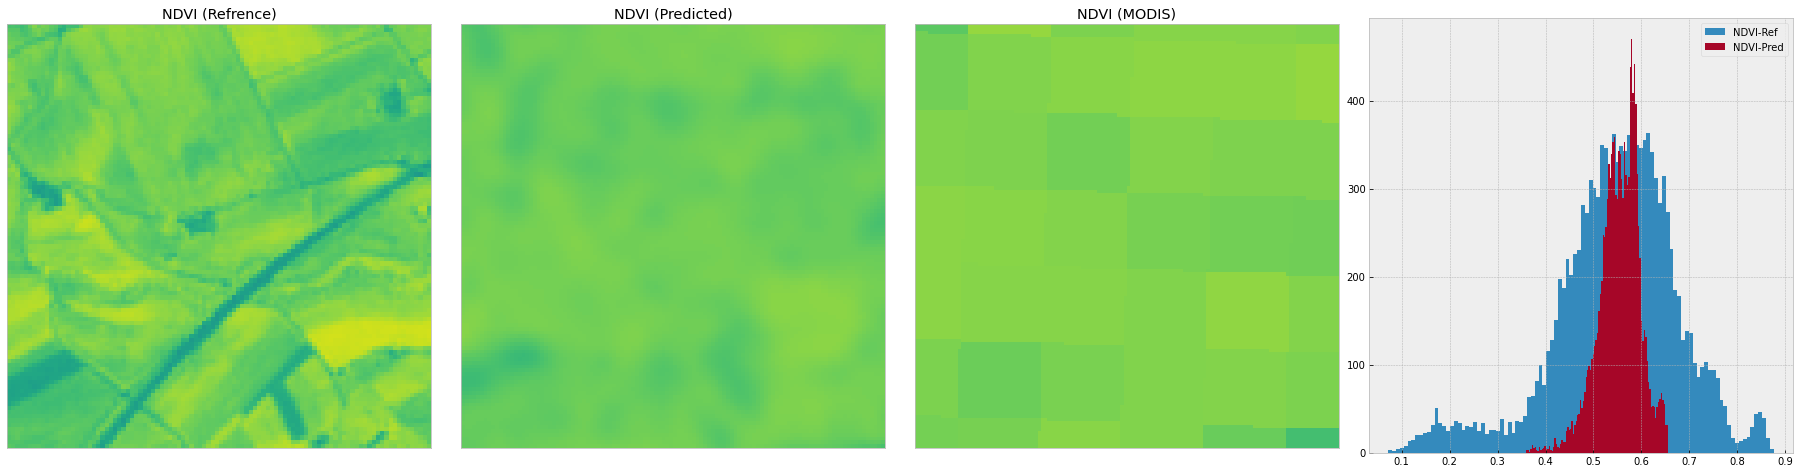

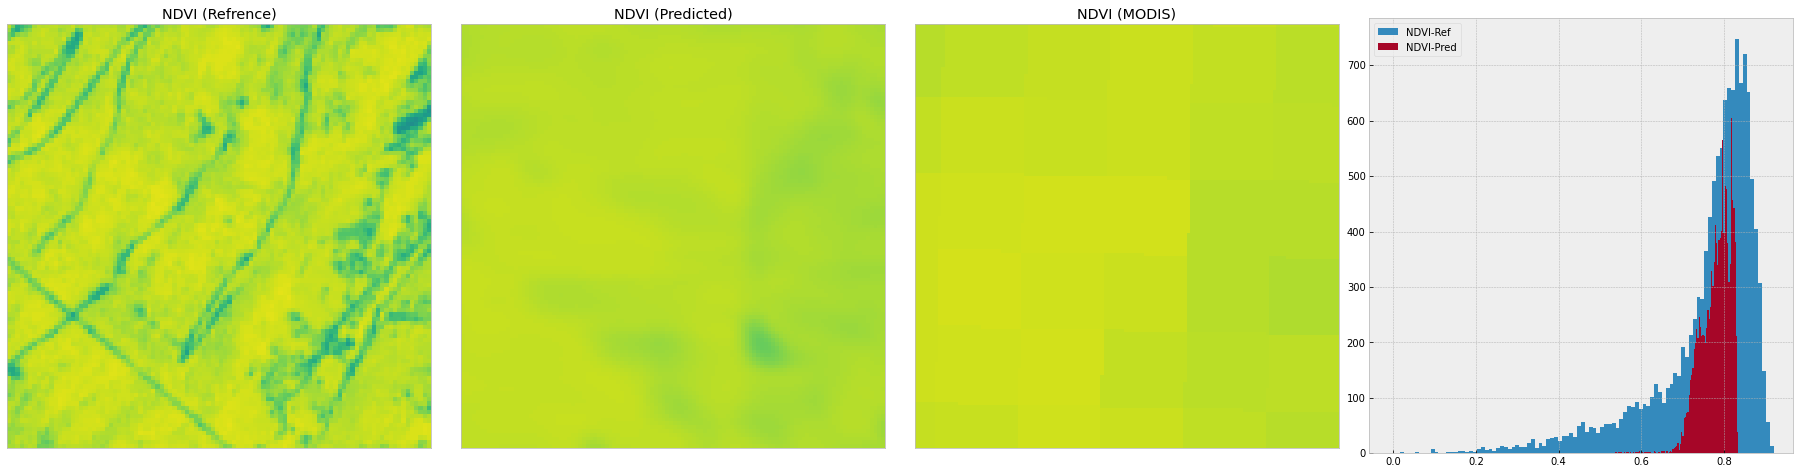

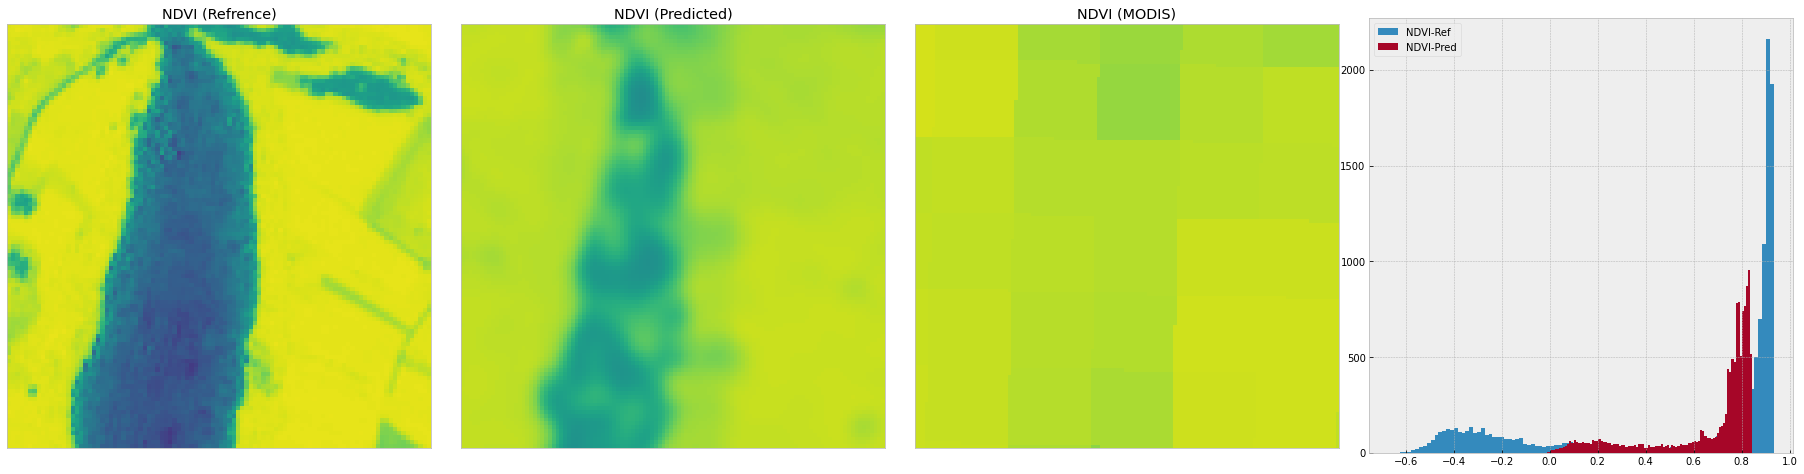

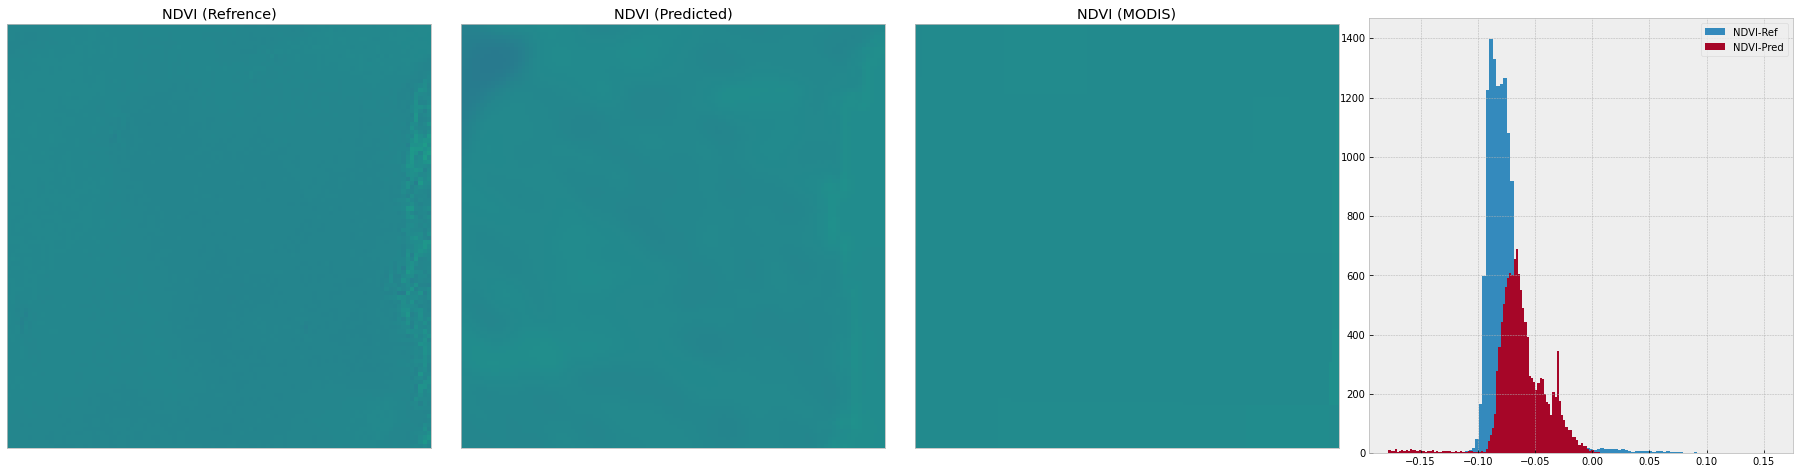

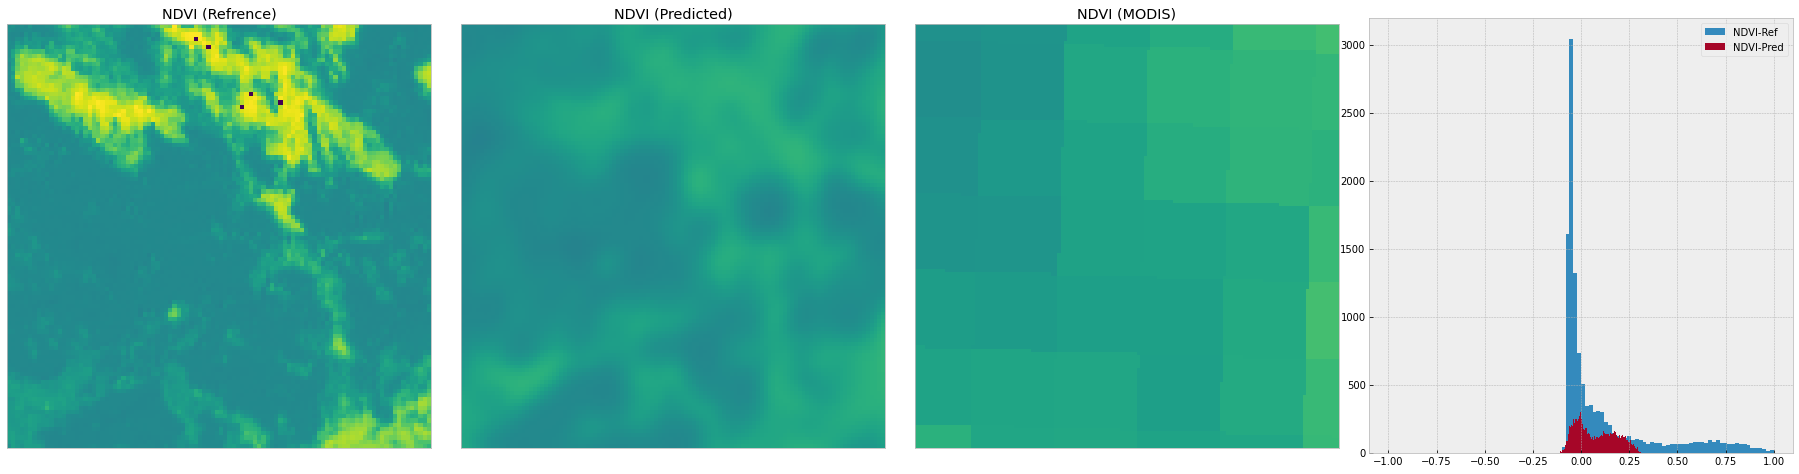

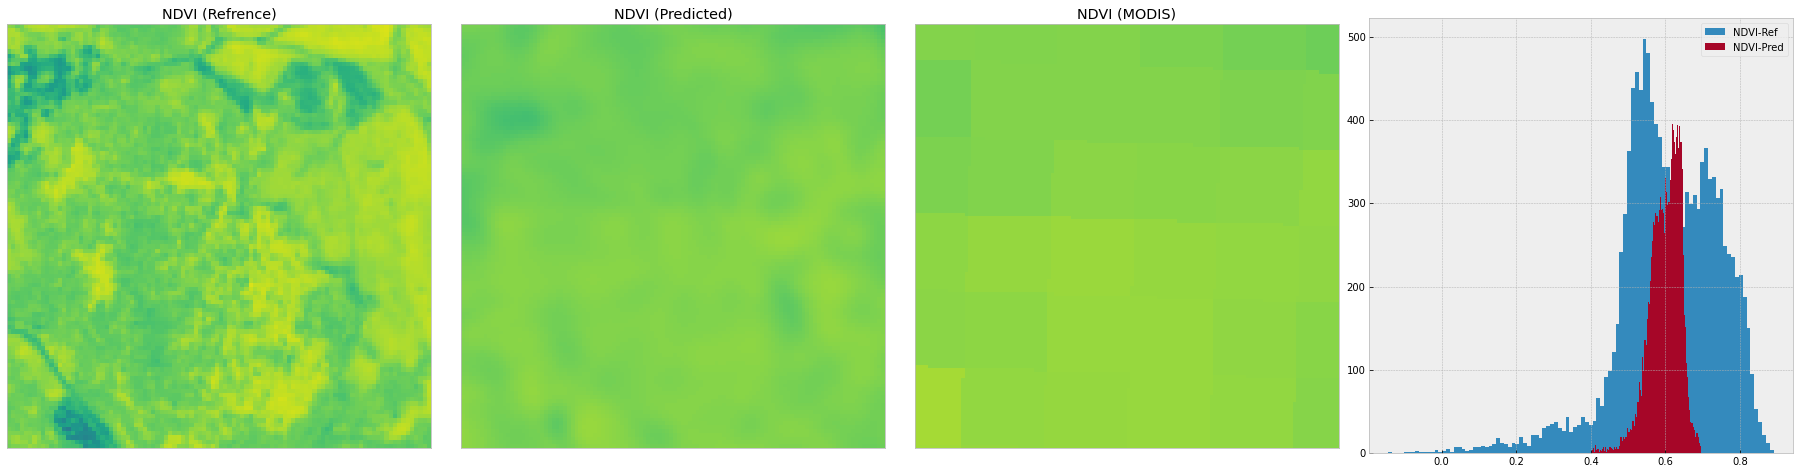

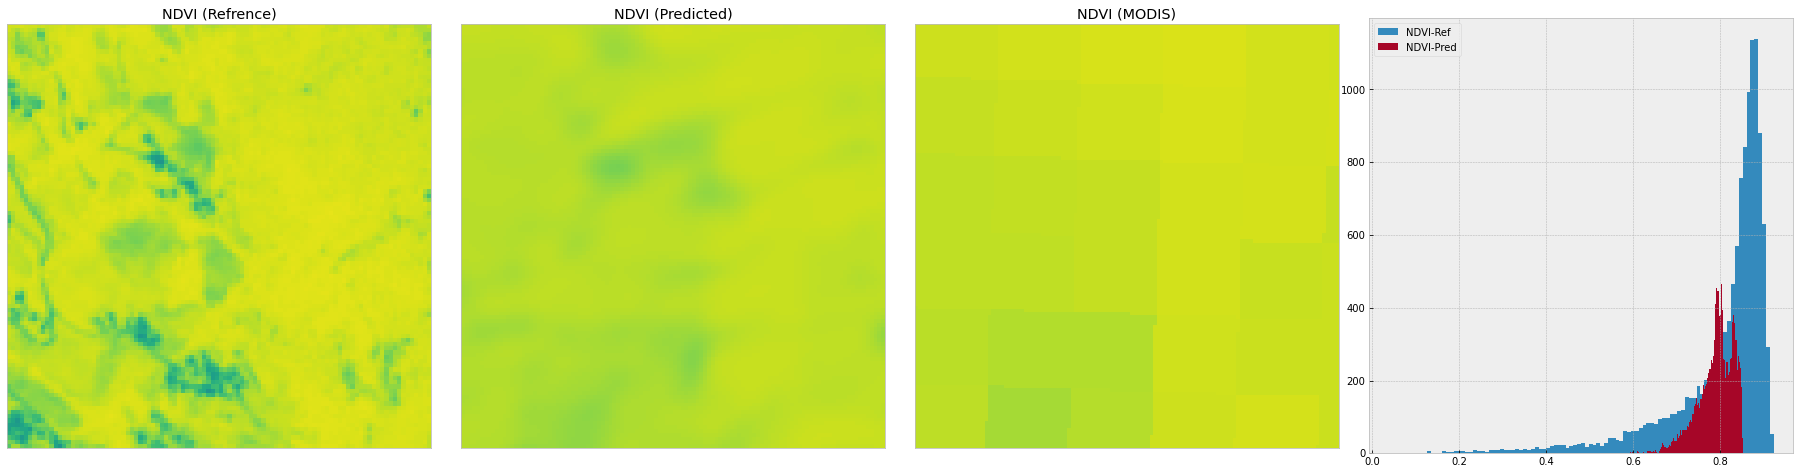

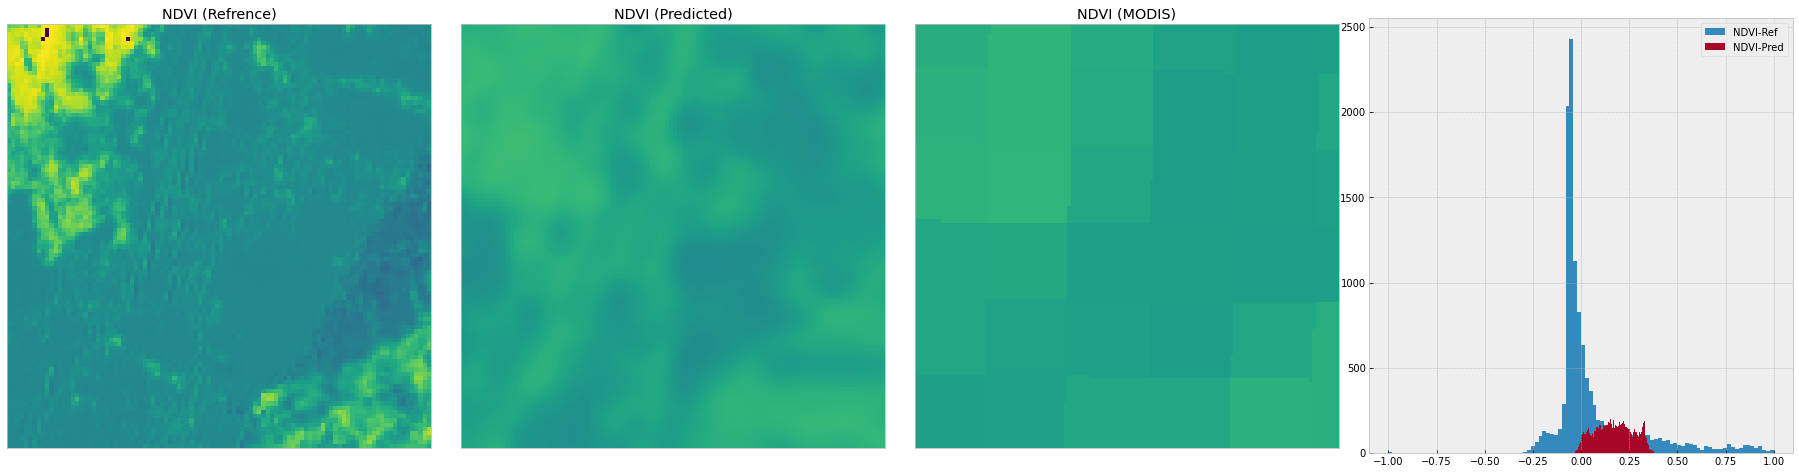

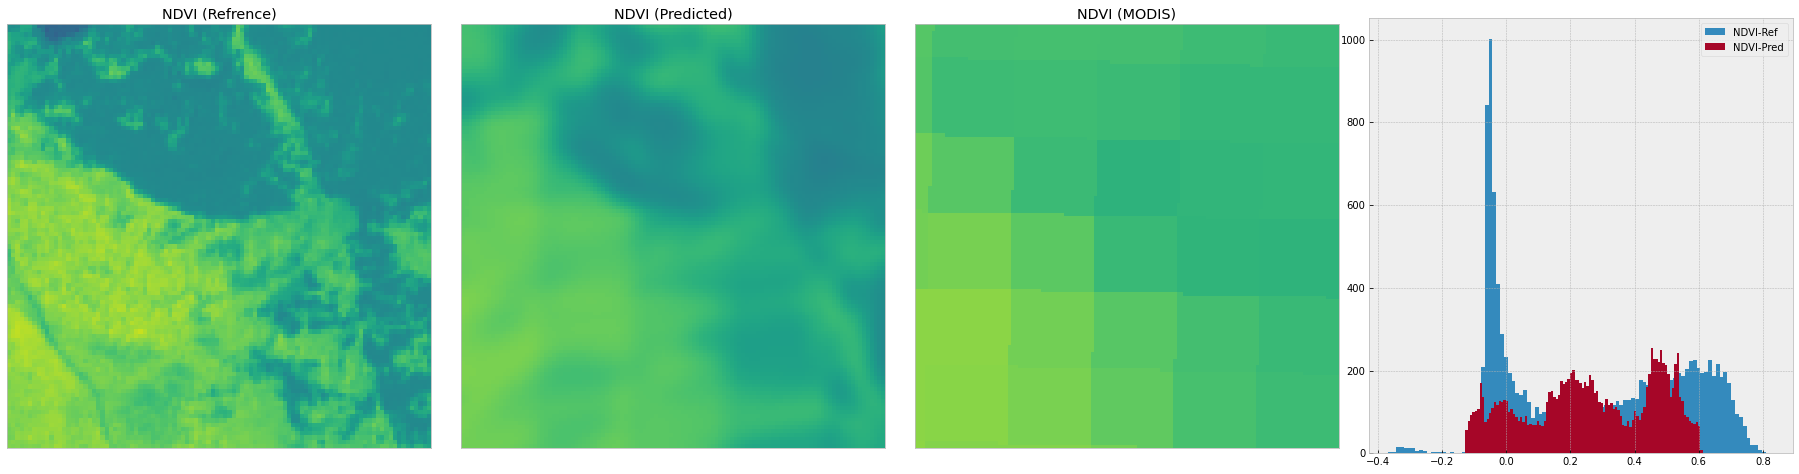

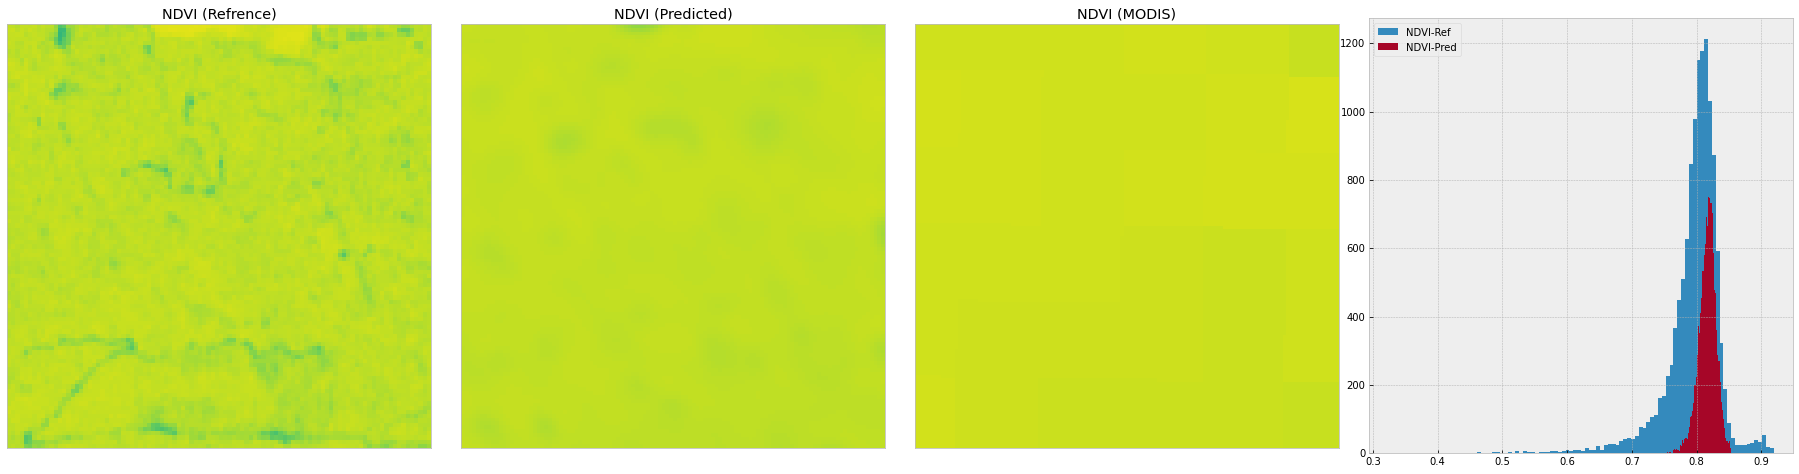

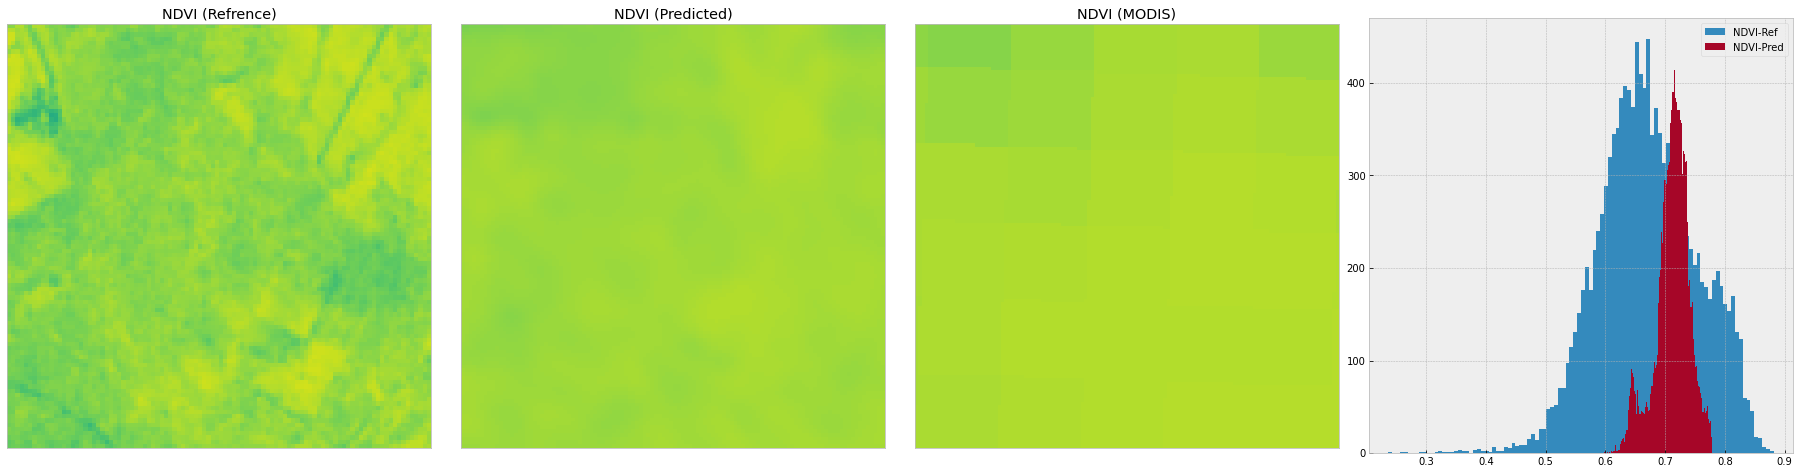

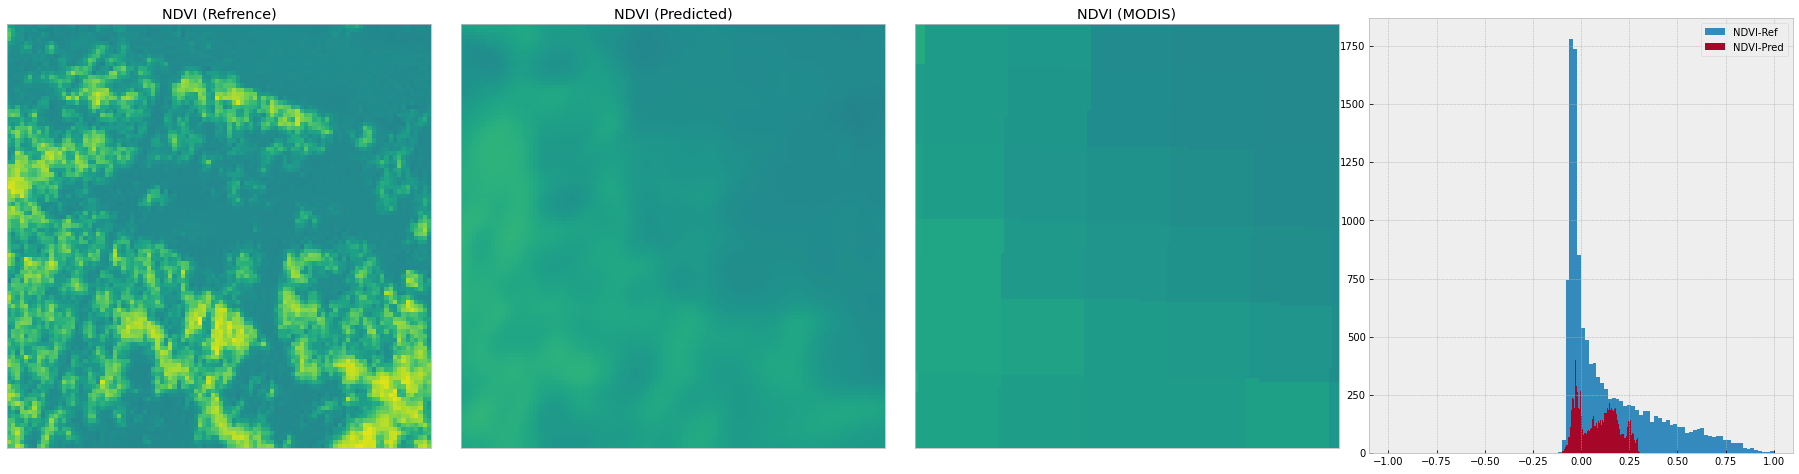

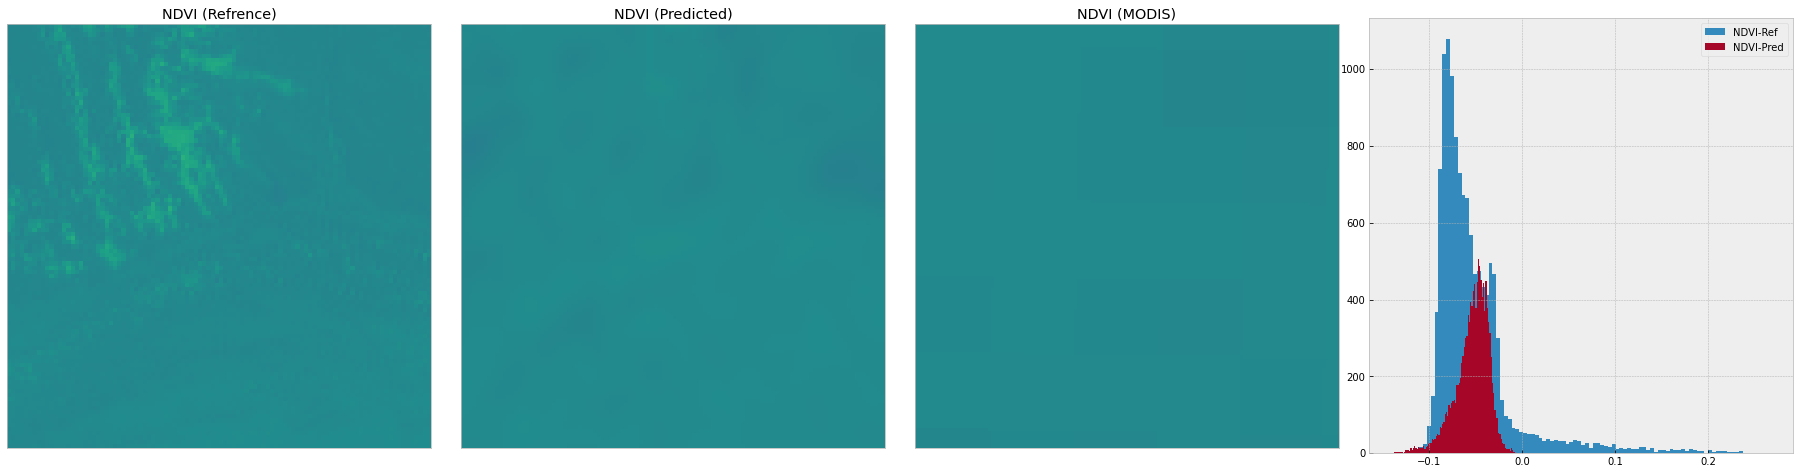

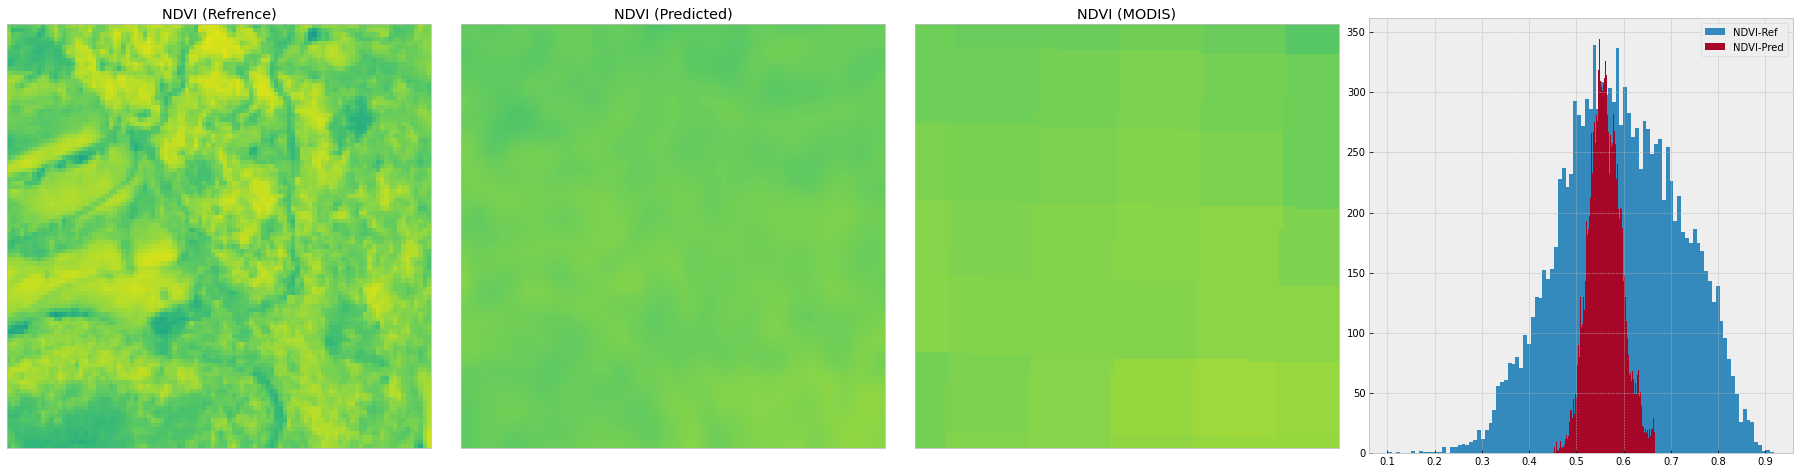

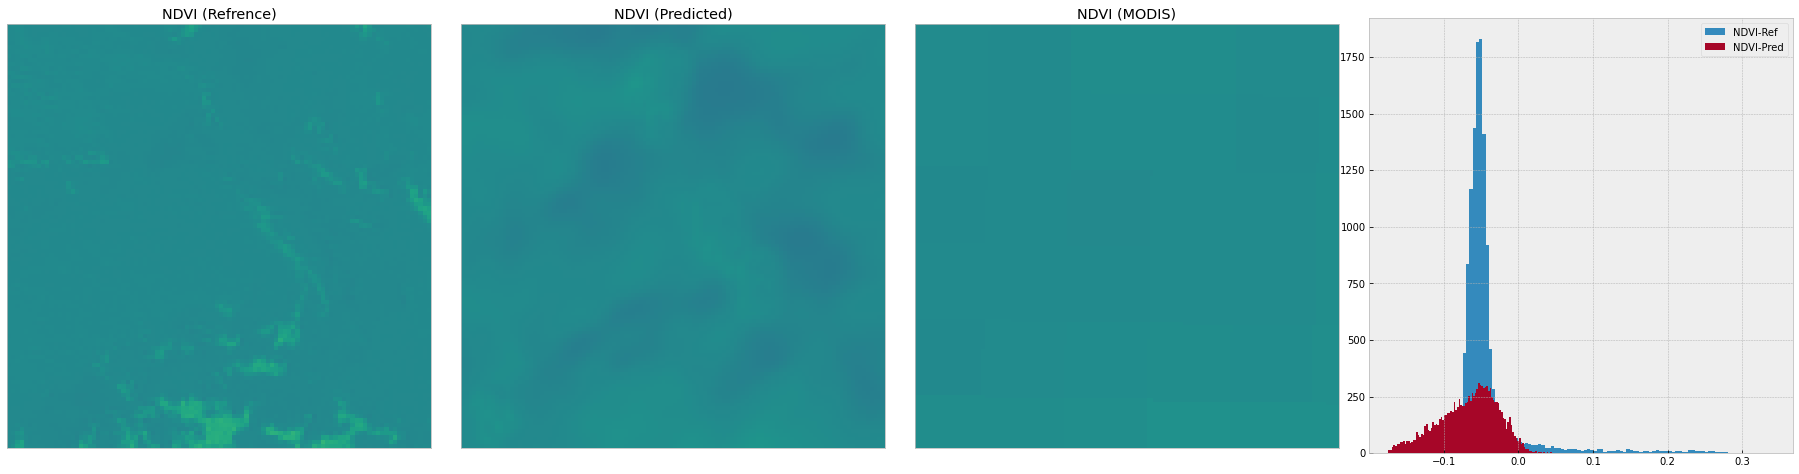

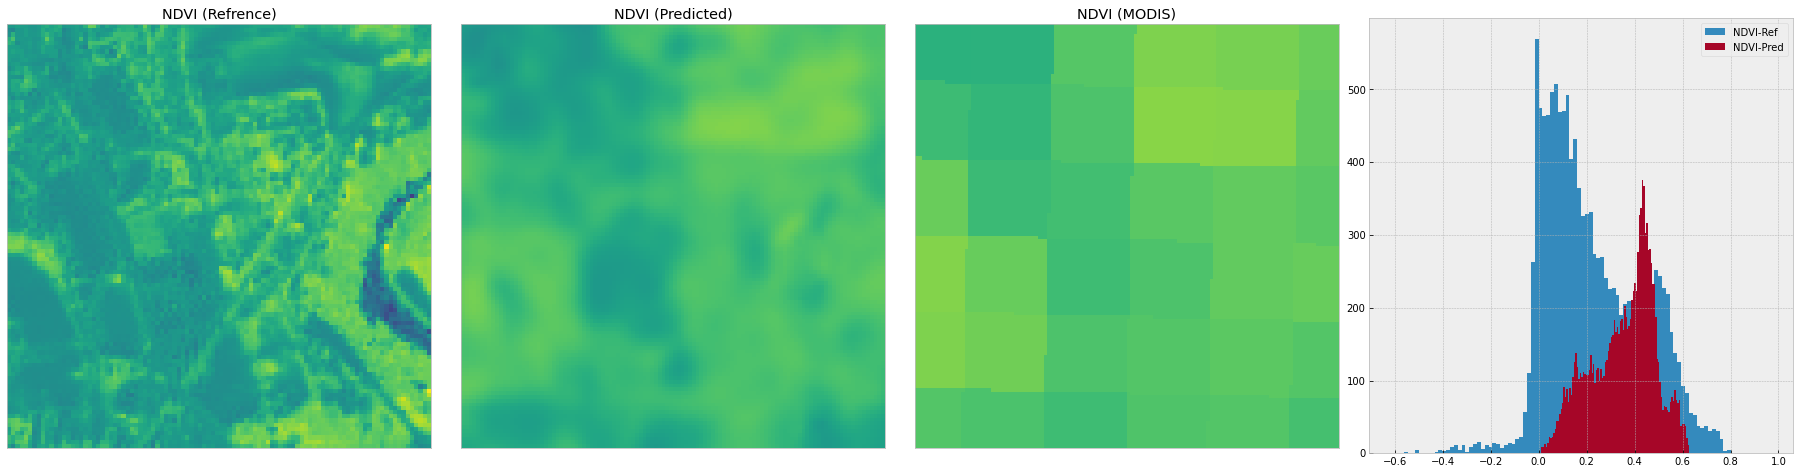

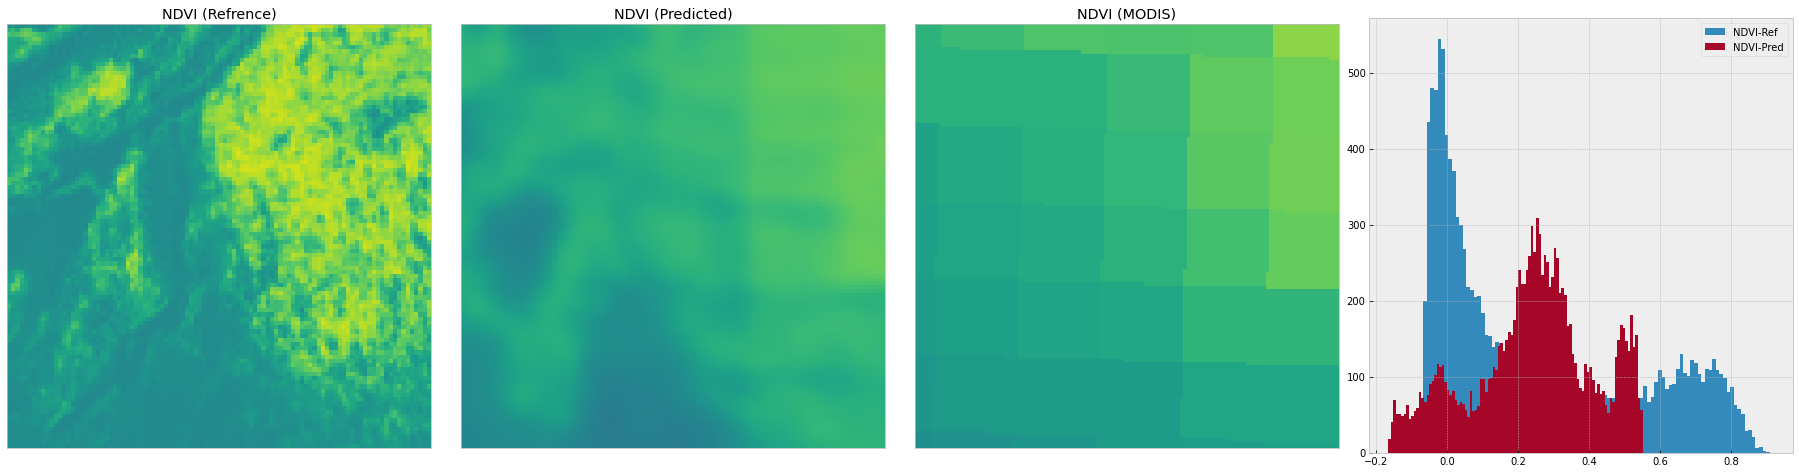

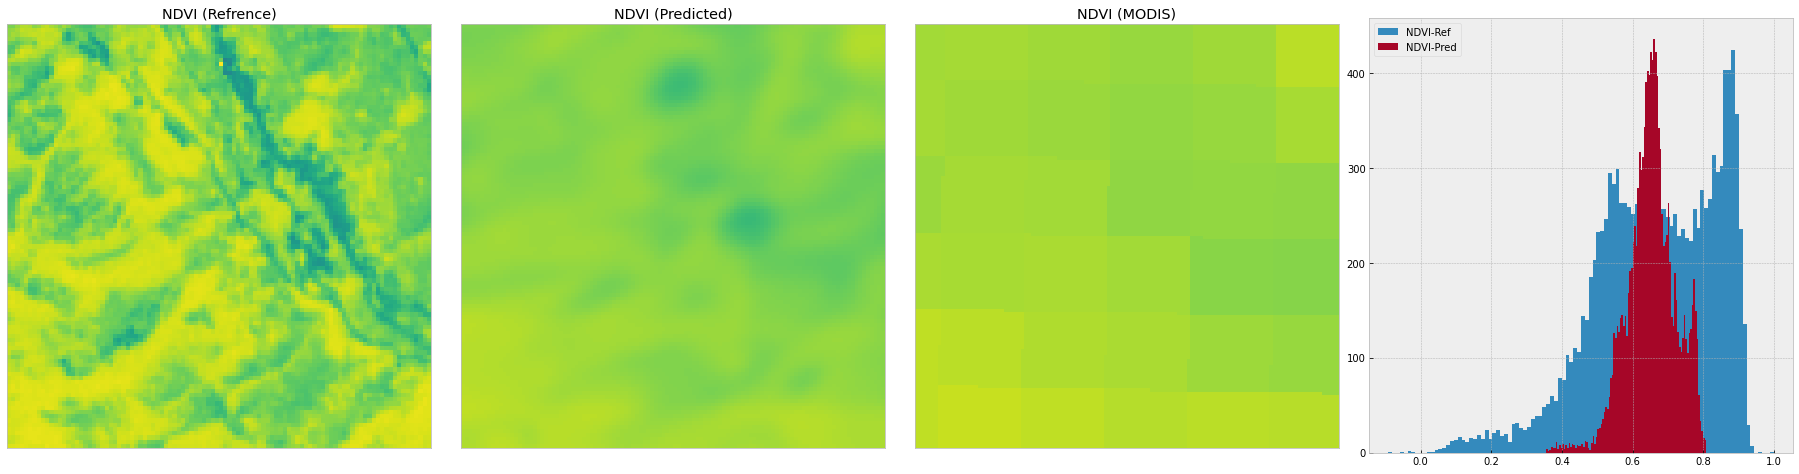

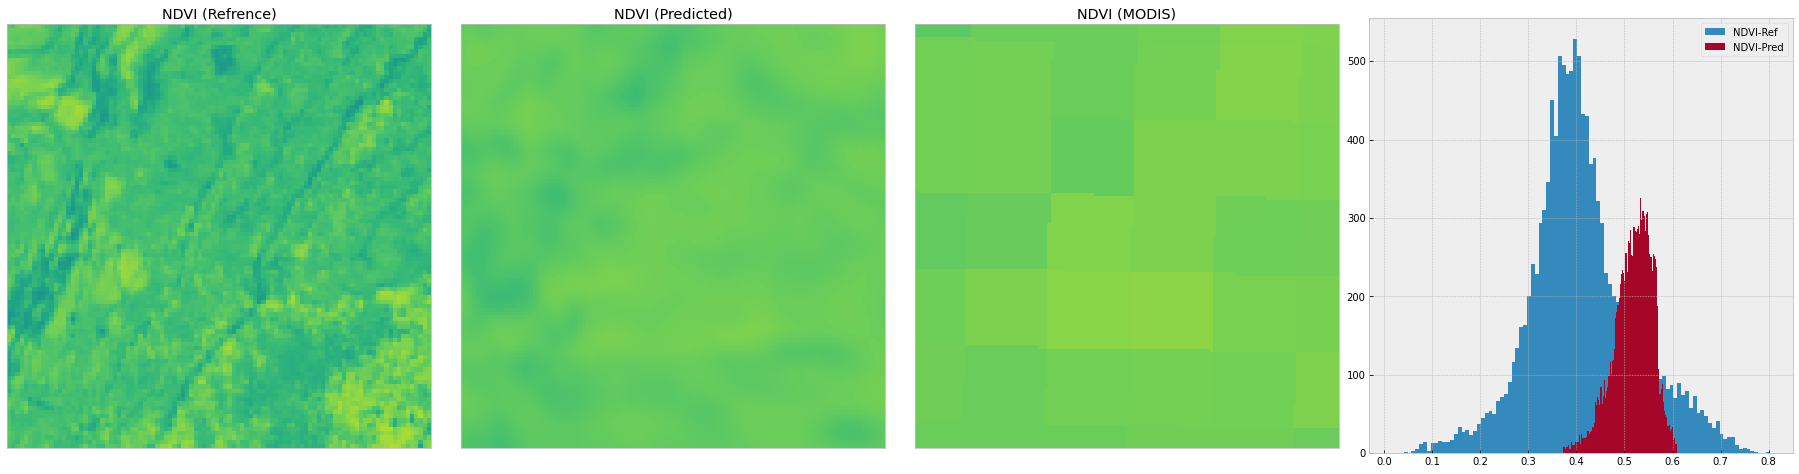

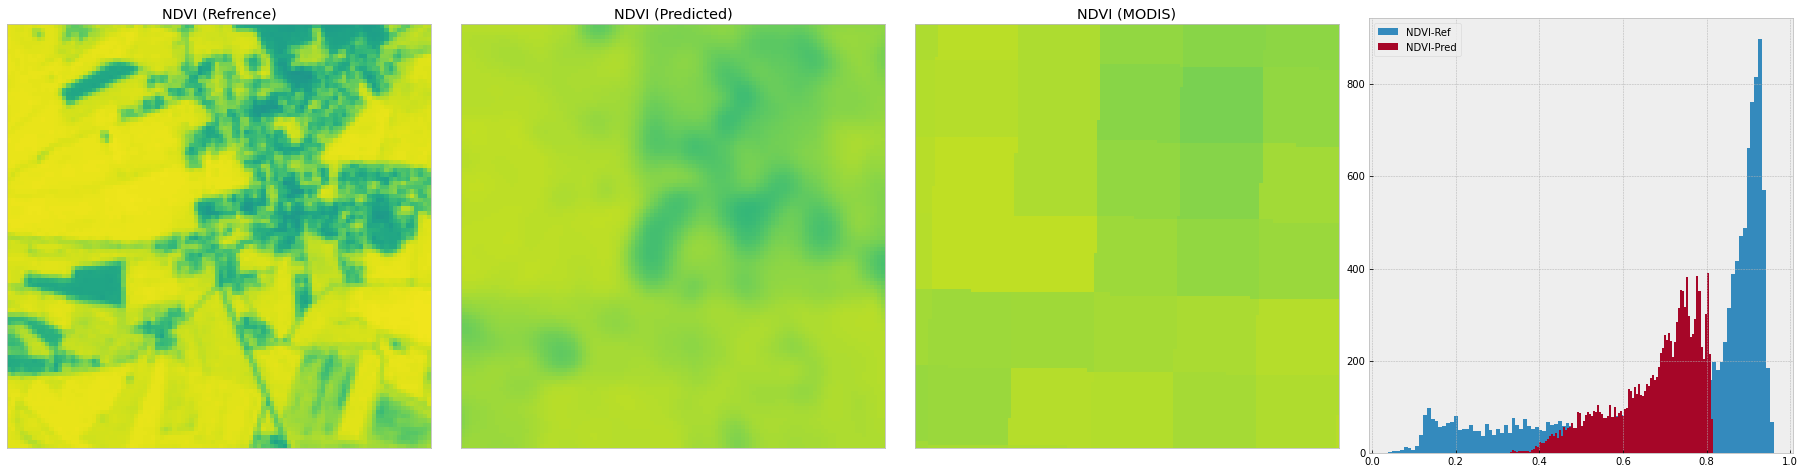

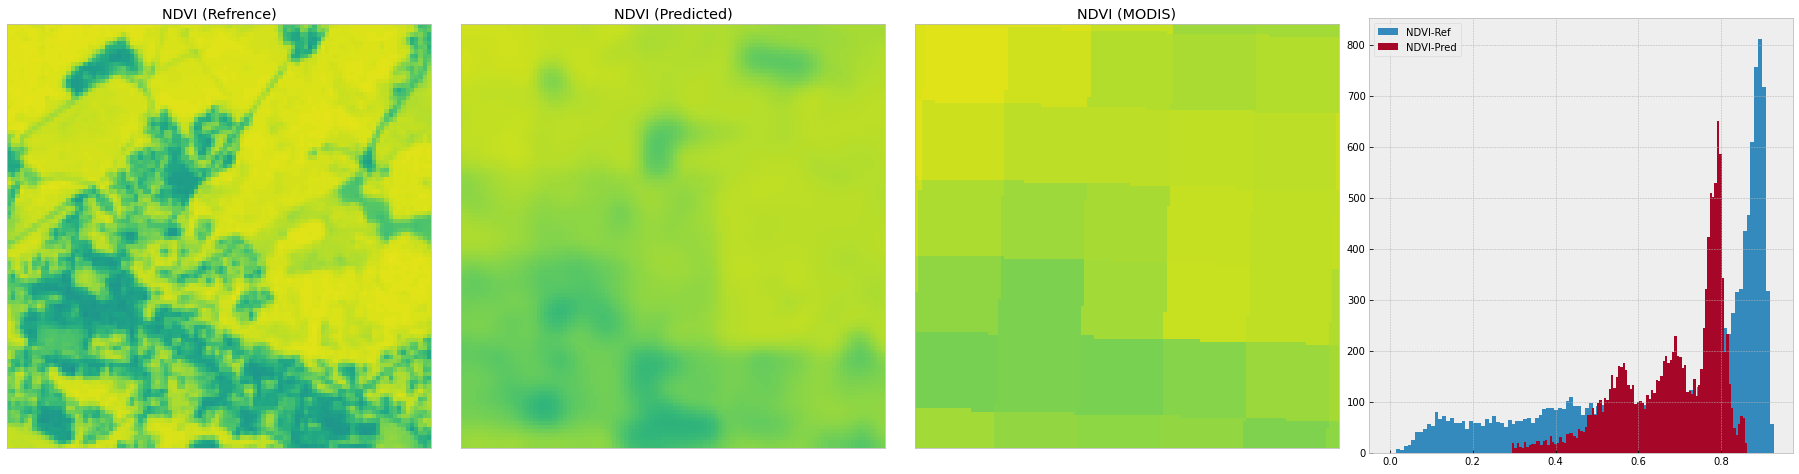

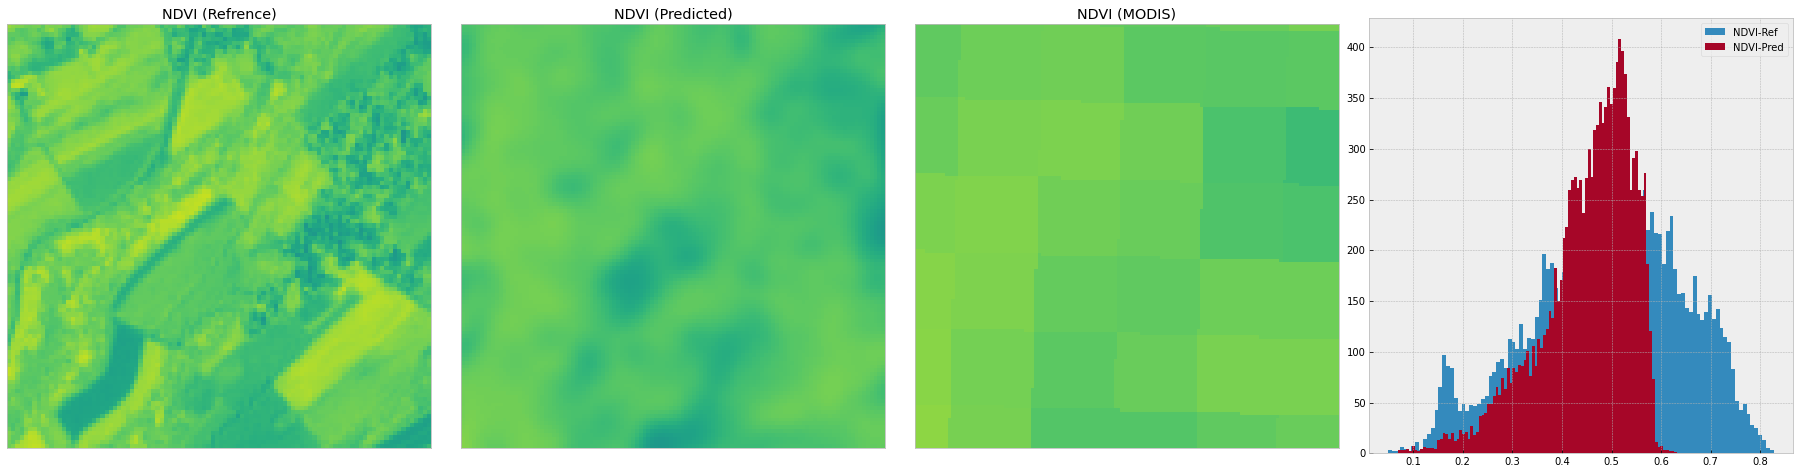

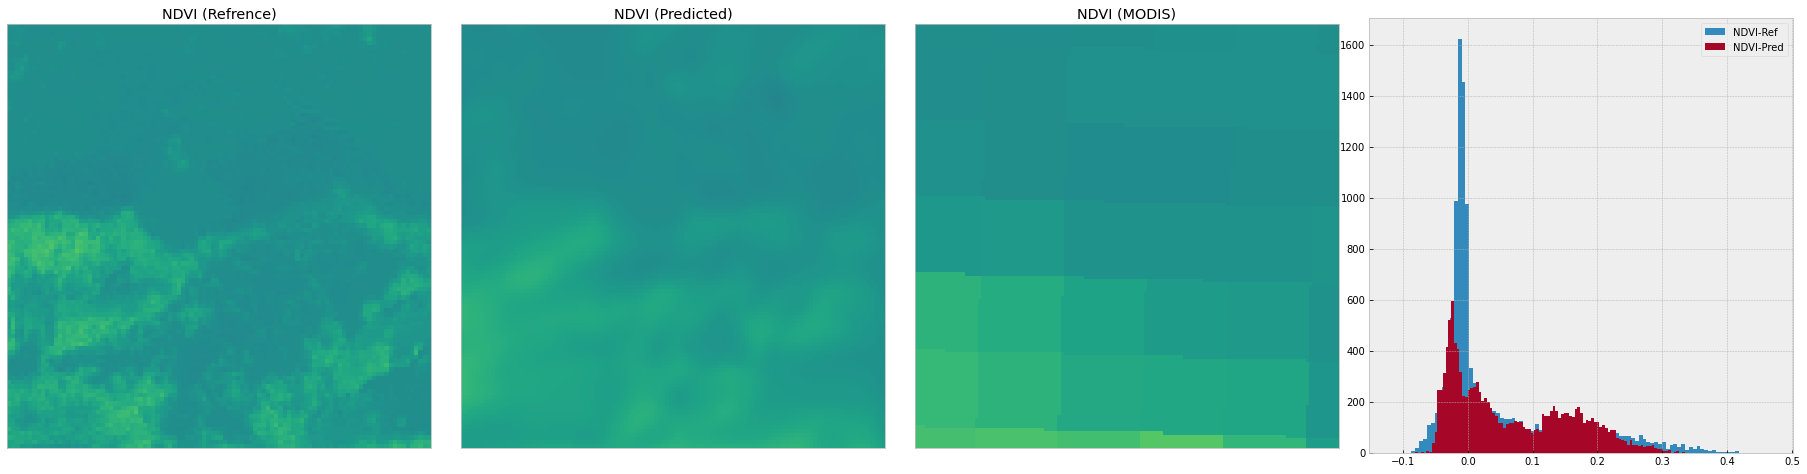

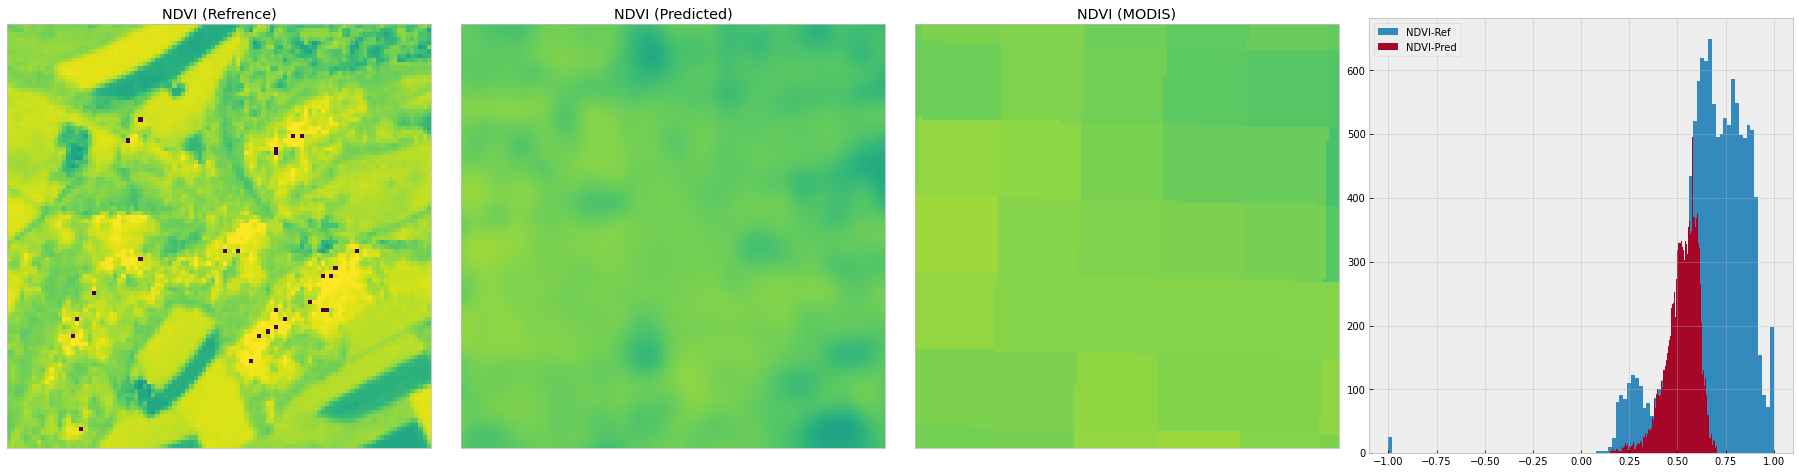

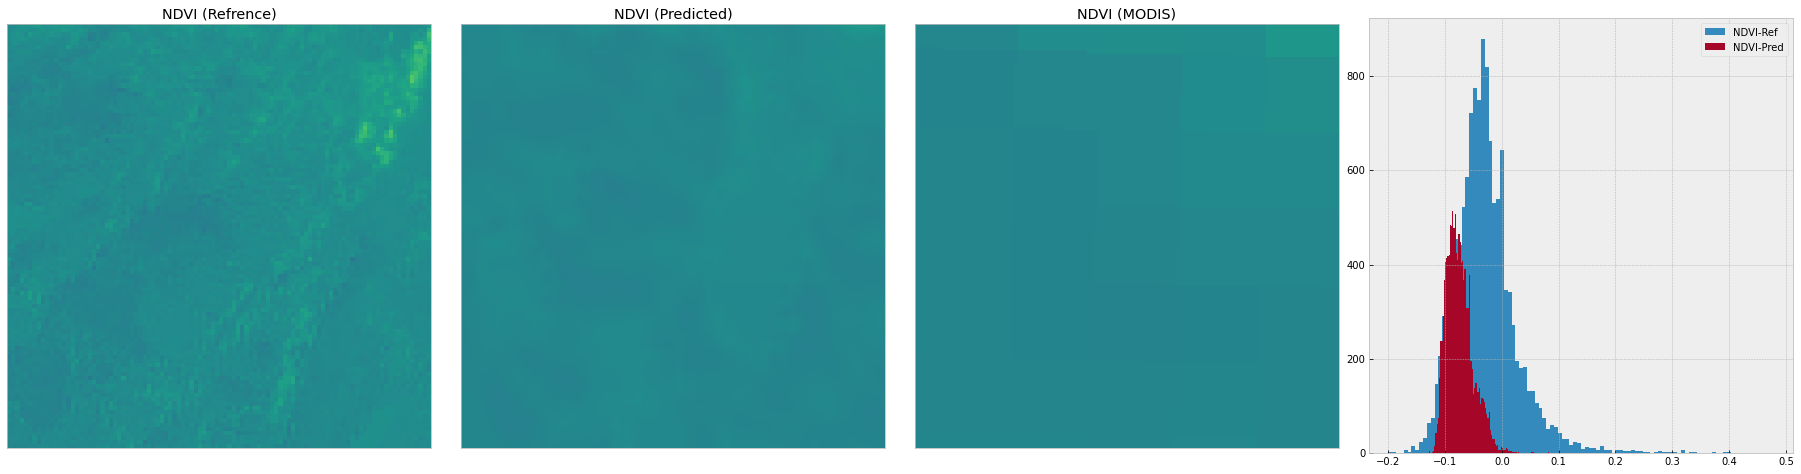

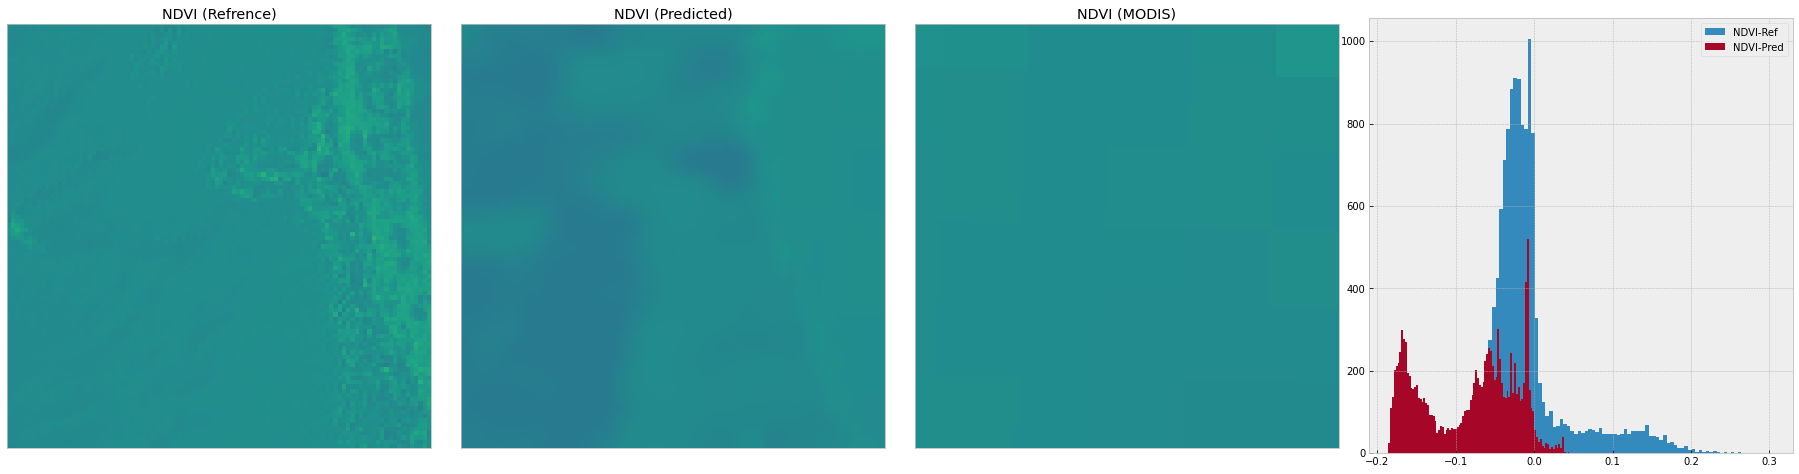

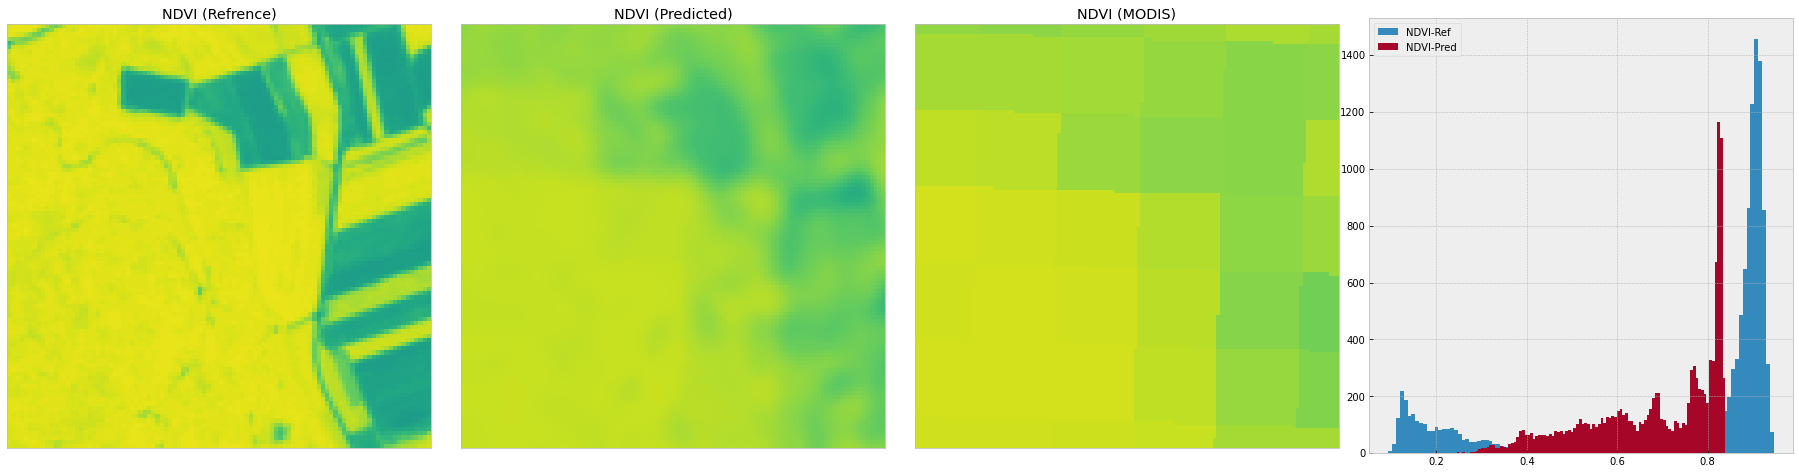

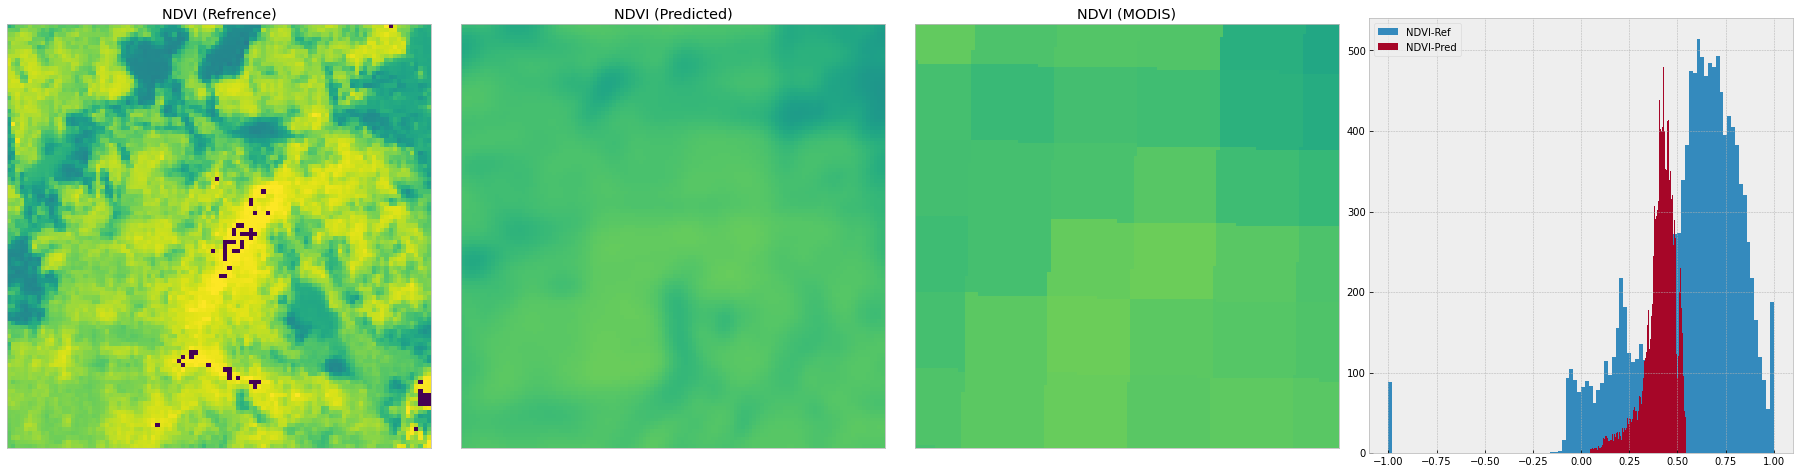

In [46]:
with torch.no_grad():
    for i in sample(range(0, len(test_data)), 50):
        fig = plt.figure(1, figsize=([32, 8]))
        gs = plt.GridSpec(8,12, wspace=0.25, hspace=0.25)


        # Panel 01
        xtr_subsplot= fig.add_subplot(gs[:,:3])
        plt.title('NDVI (Refrence)')
        ndvi_ref = test_data[i][1][0,...].cpu().detach().numpy()
        plt.imshow(ndvi_ref[6:-6,6:-6],vmin=-1, vmax=1)   
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Panel 02
        X = test_data[i][0].unsqueeze(0)
        pred_NDVI = train_model(X).to('cpu').numpy()
        xtr_subsplot= fig.add_subplot(gs[:,3:6])
        plt.title('NDVI (Predicted)')
        plt.imshow(pred_NDVI[0,0,...],vmin=-1, vmax=1)   
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        # Panel 03
        X = test_data[i][0]
        modis_NDVI = X[3,...].to('cpu').numpy()
        xtr_subsplot= fig.add_subplot(gs[:,6:9])
        plt.title('NDVI (MODIS)')
        plt.imshow(modis_NDVI,vmin=-1, vmax=1)   
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        # Panel 04
        xtr_subsplot= fig.add_subplot(gs[:,9:12])
        plt.hist(ndvi_ref.flatten(),bins=100,label='NDVI-Ref')
        plt.hist(pred_NDVI.flatten(),bins=100,label='NDVI-Pred')
        plt.legend(prop={'size': 10})
        # plt.title('NDVI (MODIS)')
        
        # plt.savefig(f'../data/visualization/s2_{i}.png', dpi=300,bbox_inches="tight")
        plt.show()
        # plt.close()